<a href="https://colab.research.google.com/github/MatthewCGalbraith/FrontiersData/blob/main/An_Analysis_of_Dialogue_Repair_in_Virtual_Assistants_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Task A & B - Testing effect of Task, Assistant, and Language on Occurence of Strategy**

## Install Packages

In [5]:
install.packages("BayesFactor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘elliptic’, ‘contfrac’, ‘deSolve’, ‘coda’, ‘pbapply’, ‘mvtnorm’, ‘MatrixModels’, ‘Rcpp’, ‘hypergeo’, ‘RcppEigen’




## Task A

### Load Data

In [13]:
#This is the data that shows Task, Assistant, and Language and the COUNTS of the occurences of the strategies

# Full Data
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/mss.csv")

# Just Task A
data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/mssA.csv")

# Just Task B
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/mssB.csv")


### Assistant

In [14]:
# Create a contingency table
cont_table <- table(data$Assistant, data$Strategy)

# Calculate row totals
row_totals <- rowSums(cont_table)

# Calculate percentages
percentage_table <- round(100 * cont_table / row_totals, 2) # shows the percentage out of the ROW

# Add row and column names for clarity
row.names(percentage_table) <- row.names(cont_table)
colnames(percentage_table) <- colnames(cont_table)

# Add a row for total percentages
total_percentage <- colSums(cont_table) / sum(cont_table) * 100
percentage_table <- rbind(percentage_table, total_percentage) # Shows the percentage of the column out of the WHOLE TABLE

# Round values to 2 decimal places
percentage_table <- round(percentage_table, 2)

# Print the percentage table
percentage_table

cont_table

,1,2,3,4,5,6,7,8,9,10
Google,3.33,13.33,10.00,3.33,13.33,20.00,16.67,10,6.67,3.33
Siri,10.00,33.33,6.67,0.00,10.00,16.67,3.33,20,0.00,0.00
total_percentage,6.67,23.33,8.33,1.67,11.67,18.33,10.00,15,3.33,1.67


        
          1  2  3  4  5  6  7  8  9 10
  Google  1  4  3  1  4  6  5  3  2  1
  Siri    3 10  2  0  3  5  1  6  0  0

In [15]:
library(BayesFactor)

# Create a contingency table for assistant
cont_table_ass <- table(data$Assistant, data$Strategy)

# Perform the Bayesian analysis with joint multinomial sampling
result_ass <- contingencyTableBF(cont_table_ass, sampleType = "jointMulti")

print("Bayesian analysis for Assistant:")
# Examine the results
summary(result_ass)

[1] "Bayesian analysis for Assistant:"
Bayes factor analysis
--------------
[1] Non-indep. (a=1) : 1.41759 ±0%

Against denominator:
  Null, independence, a = 1 
---
Bayes factor type: BFcontingencyTable, joint multinomial



### Language

In [16]:
# Create a contingency table
cont_table <- table(data$Language, data$Strategy)

# Calculate row totals
row_totals <- rowSums(cont_table)

# Calculate percentages
percentage_table <- round(100 * cont_table / row_totals, 2) # shows the percentage out of the ROW

# Add row and column names for clarity
row.names(percentage_table) <- row.names(cont_table)
colnames(percentage_table) <- colnames(cont_table)

# Add a row for total percentages
total_percentage <- colSums(cont_table) / sum(cont_table) * 100
percentage_table <- rbind(percentage_table, total_percentage) # Shows the percentage of the column out of the WHOLE TABLE

# Round values to 2 decimal places
percentage_table <- round(percentage_table, 2)

# Print the percentage table
percentage_table

cont_table

,1,2,3,4,5,6,7,8,9,10
English,6.67,23.33,3.33,3.33,16.67,16.67,13.33,13.33,3.33,0.00
Spanish,6.67,23.33,13.33,0.00,6.67,20.00,6.67,16.67,3.33,3.33
total_percentage,6.67,23.33,8.33,1.67,11.67,18.33,10.00,15.00,3.33,1.67


         
          1 2 3 4 5 6 7 8 9 10
  English 2 7 1 1 5 5 4 4 1  0
  Spanish 2 7 4 0 2 6 2 5 1  1

In [17]:
library(BayesFactor)

# Create a contingency table for assistant
cont_table_lang <- table(data$Language, data$Strategy)

# Perform the Bayesian analysis with joint multinomial sampling
result_lang <- contingencyTableBF(cont_table_lang, sampleType = "jointMulti")

print("Bayesian analysis for Language:")
# Examine the results
summary(result_lang)

[1] "Bayesian analysis for Language:"
Bayes factor analysis
--------------
[1] Non-indep. (a=1) : 0.1225078 ±0%

Against denominator:
  Null, independence, a = 1 
---
Bayes factor type: BFcontingencyTable, joint multinomial



## Task B

### Load Data

In [18]:
#This is the data that shows Task, Assistant, and Language and the COUNTS of the occurences of the strategies

# Full Data
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/mss.csv")

# Just Task A
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/mssA.csv")

# Just Task B
data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/mssB.csv")


### Assistant

In [19]:
# Create a contingency table
cont_table <- table(data$Assistant, data$Strategy)

# Calculate row totals
row_totals <- rowSums(cont_table)

# Calculate percentages
percentage_table <- round(100 * cont_table / row_totals, 2) # shows the percentage out of the ROW

# Add row and column names for clarity
row.names(percentage_table) <- row.names(cont_table)
colnames(percentage_table) <- colnames(cont_table)

# Add a row for total percentages
total_percentage <- colSums(cont_table) / sum(cont_table) * 100
percentage_table <- rbind(percentage_table, total_percentage) # Shows the percentage of the column out of the WHOLE TABLE

# Round values to 2 decimal places
percentage_table <- round(percentage_table, 2)

# Print the percentage table
percentage_table

cont_table

,2,4,5,8,9
Google,0.0,90.0,7.5,0.00,2.50
Siri,5.0,5.0,42.5,17.50,30.00
total_percentage,2.5,47.5,25.0,8.75,16.25


        
          2  4  5  8  9
  Google  0 36  3  0  1
  Siri    2  2 17  7 12

In [20]:
library(BayesFactor)

# Create a contingency table for assistant
cont_table_ass <- table(data$Assistant, data$Strategy)

# Perform the Bayesian analysis with joint multinomial sampling
result_ass <- contingencyTableBF(cont_table_ass, sampleType = "jointMulti")

print("Bayesian analysis for Assistant:")
# Examine the results
summary(result_ass)

[1] "Bayesian analysis for Assistant:"
Bayes factor analysis
--------------
[1] Non-indep. (a=1) : 2.53724e+12 ±0%

Against denominator:
  Null, independence, a = 1 
---
Bayes factor type: BFcontingencyTable, joint multinomial



### Language

In [21]:
# Create a contingency table
cont_table <- table(data$Language, data$Strategy)

# Calculate row totals
row_totals <- rowSums(cont_table)

# Calculate percentages
percentage_table <- round(100 * cont_table / row_totals, 2) # shows the percentage out of the ROW

# Add row and column names for clarity
row.names(percentage_table) <- row.names(cont_table)
colnames(percentage_table) <- colnames(cont_table)

# Add a row for total percentages
total_percentage <- colSums(cont_table) / sum(cont_table) * 100
percentage_table <- rbind(percentage_table, total_percentage) # Shows the percentage of the column out of the WHOLE TABLE

# Round values to 2 decimal places
percentage_table <- round(percentage_table, 2)

# Print the percentage table
percentage_table

cont_table

,2,4,5,8,9
English,5.0,40.0,20,2.50,32.50
Spanish,0.0,55.0,30,15.00,0.00
total_percentage,2.5,47.5,25,8.75,16.25


         
           2  4  5  8  9
  English  2 16  8  1 13
  Spanish  0 22 12  6  0

In [22]:
library(BayesFactor)

# Create a contingency table for assistant
cont_table_lang <- table(data$Language, data$Strategy)

# Perform the Bayesian analysis with joint multinomial sampling
result_lang <- contingencyTableBF(cont_table_lang, sampleType = "jointMulti")

print("Bayesian analysis for Language:")
# Examine the results
summary(result_lang)

[1] "Bayesian analysis for Language:"
Bayes factor analysis
--------------
[1] Non-indep. (a=1) : 1347.925 ±0%

Against denominator:
  Null, independence, a = 1 
---
Bayes factor type: BFcontingencyTable, joint multinomial



## Task A and B Combined

### Load Data

In [23]:
#This is the data that shows Task, Assistant, and Language and the COUNTS of the occurences of the strategies

# Full Data
data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/mss.csv")

# Just Task A
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/mssA.csv")

# Just Task B
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/mssB.csv")


### Assistant

In [24]:
# Create a contingency table
cont_table <- table(data$Assistant, data$Strategy)

# Calculate row totals
row_totals <- rowSums(cont_table)

# Calculate percentages
percentage_table <- round(100 * cont_table / row_totals, 2) # shows the percentage out of the ROW

# Add row and column names for clarity
row.names(percentage_table) <- row.names(cont_table)
colnames(percentage_table) <- colnames(cont_table)

# Add a row for total percentages
total_percentage <- colSums(cont_table) / sum(cont_table) * 100
percentage_table <- rbind(percentage_table, total_percentage) # Shows the percentage of the column out of the WHOLE TABLE

# Round values to 2 decimal places
percentage_table <- round(percentage_table, 2)

# Print the percentage table
percentage_table

cont_table

,1,2,3,4,5,6,7,8,9,10
Google,1.43,5.71,4.29,52.86,10.00,8.57,7.14,4.29,4.29,1.43
Siri,4.29,17.14,2.86,2.86,28.57,7.14,1.43,18.57,17.14,0.00
total_percentage,2.86,11.43,3.57,27.86,19.29,7.86,4.29,11.43,10.71,0.71


        
          1  2  3  4  5  6  7  8  9 10
  Google  1  4  3 37  7  6  5  3  3  1
  Siri    3 12  2  2 20  5  1 13 12  0

In [25]:
library(BayesFactor)

# Create a contingency table for assistant
cont_table_ass <- table(data$Assistant, data$Strategy)

# Perform the Bayesian analysis with joint multinomial sampling
result_ass <- contingencyTableBF(cont_table_ass, sampleType = "jointMulti")

print("Bayesian analysis for Assistant:")
# Examine the results
summary(result_ass)

[1] "Bayesian analysis for Assistant:"
Bayes factor analysis
--------------
[1] Non-indep. (a=1) : 16941296276 ±0%

Against denominator:
  Null, independence, a = 1 
---
Bayes factor type: BFcontingencyTable, joint multinomial



### Language

In [26]:
# Create a contingency table
cont_table <- table(data$Language, data$Strategy)

# Calculate row totals
row_totals <- rowSums(cont_table)

# Calculate percentages
percentage_table <- round(100 * cont_table / row_totals, 2) # shows the percentage out of the ROW

# Add row and column names for clarity
row.names(percentage_table) <- row.names(cont_table)
colnames(percentage_table) <- colnames(cont_table)

# Add a row for total percentages
total_percentage <- colSums(cont_table) / sum(cont_table) * 100
percentage_table <- rbind(percentage_table, total_percentage) # Shows the percentage of the column out of the WHOLE TABLE

# Round values to 2 decimal places
percentage_table <- round(percentage_table, 2)

# Print the percentage table
percentage_table

cont_table

,1,2,3,4,5,6,7,8,9,10
English,2.86,12.86,1.43,24.29,18.57,7.14,5.71,7.14,20.00,0.00
Spanish,2.86,10.00,5.71,31.43,20.00,8.57,2.86,15.71,1.43,1.43
total_percentage,2.86,11.43,3.57,27.86,19.29,7.86,4.29,11.43,10.71,0.71


         
           1  2  3  4  5  6  7  8  9 10
  English  2  9  1 17 13  5  4  5 14  0
  Spanish  2  7  4 22 14  6  2 11  1  1

In [27]:
library(BayesFactor)

# Create a contingency table for assistant
cont_table_lang <- table(data$Language, data$Strategy)

# Perform the Bayesian analysis with joint multinomial sampling
result_lang <- contingencyTableBF(cont_table_lang, sampleType = "jointMulti")

print("Bayesian analysis for Language:")
# Examine the results
summary(result_lang)

[1] "Bayesian analysis for Language:"
Bayes factor analysis
--------------
[1] Non-indep. (a=1) : 3.594331 ±0%

Against denominator:
  Null, independence, a = 1 
---
Bayes factor type: BFcontingencyTable, joint multinomial



### Task

In [28]:
# Create a contingency table
cont_table <- table(data$Task, data$Strategy)

# Calculate row totals
row_totals <- rowSums(cont_table)

# Calculate percentages
percentage_table <- round(100 * cont_table / row_totals, 2) # shows the percentage out of the ROW

# Add row and column names for clarity
row.names(percentage_table) <- row.names(cont_table)
colnames(percentage_table) <- colnames(cont_table)

# Add a row for total percentages
total_percentage <- colSums(cont_table) / sum(cont_table) * 100
percentage_table <- rbind(percentage_table, total_percentage) # Shows the percentage of the column out of the WHOLE TABLE

# Round values to 2 decimal places
percentage_table <- round(percentage_table, 2)

# Print the percentage table
percentage_table

cont_table

,1,2,3,4,5,6,7,8,9,10
A,6.67,23.33,8.33,1.67,11.67,18.33,10.00,15.00,3.33,1.67
B,0.00,2.50,0.00,47.50,25.00,0.00,0.00,8.75,16.25,0.00
total_percentage,2.86,11.43,3.57,27.86,19.29,7.86,4.29,11.43,10.71,0.71


   
     1  2  3  4  5  6  7  8  9 10
  A  4 14  5  1  7 11  6  9  2  1
  B  0  2  0 38 20  0  0  7 13  0

In [29]:
library(BayesFactor)

# Create a contingency table for assistant
cont_table_task <- table(data$Task, data$Strategy)

# Perform the Bayesian analysis with joint multinomial sampling
result_task <- contingencyTableBF(cont_table_task, sampleType = "jointMulti")

print("Bayesian analysis for Task:")
# Examine the results
summary(result_task)

[1] "Bayesian analysis for Task:"
Bayes factor analysis
--------------
[1] Non-indep. (a=1) : 2.766529e+16 ±0%

Against denominator:
  Null, independence, a = 1 
---
Bayes factor type: BFcontingencyTable, joint multinomial



# 2. **Task C - Testing effect of Task, Strategy, and Language on Likert Scores**

## Install Packages

In [ ]:
#Install packages
install.packages(c("ggplot2", "scales", "ordinal","emmeans","broom","writexl","readxl", "openxlsx"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ucminf’, ‘numDeriv’, ‘estimability’, ‘mvtnorm’, ‘Rcpp’




## English and Spanish

### 2.0 Load Data

In [ ]:
#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all tasks
data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullAB.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all Task A and Task B for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullABEnglish.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all Task A and Task B for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullABSpanish.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task A for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajEnglishA.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task B for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajEnglishB.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task A for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajSpanishA.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task B for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajSpanishB.csv")

In [ ]:
# Set excel path for the data to be written
excel <- "ajfullAB.xlsx"

### 2.1 Fit Ordinal Model

In [ ]:
library(ordinal)

# Convert Likert to factor
data$Likert <- factor(data$Likert)

# Fit the Ordinal Regression Model
o <- clm(Likert ~ Strategy + Assistant + Task + Language, data = data)

# Check summary of model
summary(o)

formula: Likert ~ Strategy + Assistant + Task + Language
data:    data

 link  threshold nobs logLik   AIC      niter max.grad cond.H 
 logit flexible  4000 -5674.97 11381.93 5(0)  5.83e-13 3.7e+02

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
StrategyStrat10 -0.41546    0.12631  -3.289 0.001005 ** 
StrategyStrat2  -0.02135    0.12915  -0.165 0.868670    
StrategyStrat3   1.27578    0.13664   9.337  < 2e-16 ***
StrategyStrat4  -0.27221    0.12621  -2.157 0.031026 *  
StrategyStrat5   1.97296    0.14304  13.794  < 2e-16 ***
StrategyStrat6  -1.25142    0.12729  -9.831  < 2e-16 ***
StrategyStrat7  -0.45434    0.12827  -3.542 0.000397 ***
StrategyStrat8   0.38143    0.12502   3.051 0.002282 ** 
StrategyStrat9  -0.74344    0.12547  -5.925 3.12e-09 ***
AssistantSiri    0.25445    0.05809   4.380 1.19e-05 ***
TaskB            0.49187    0.05832   8.434  < 2e-16 ***
LanguageSpanish -0.57025    0.05852  -9.744  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

In [ ]:
library(ordinal)
library(broom)
library(writexl)
library(readxl)
library(openxlsx)

# Convert Likert to factor
data$Likert <- factor(data$Likert)

# Fit the Ordinal Regression Model
o <- clm(Likert ~ Strategy + Assistant + Task + Language, data = data)

# Extract coefficients and related information
coefficients_df <- tidy(o)

# Extract Odds Ratios and Confidence Intervals
odds_ratio <- exp(coef(o))
conf_intervals <- exp(confint.default(o))

# Create a dataframe
effect <- rownames(coefficients_df)
coefficient <- coefficients_df$estimate
std_error <- coefficients_df$std.error
z_value <- coefficients_df$statistic
p_value <- coefficients_df$p.value
odds_ratio_val <- odds_ratio
ci_lower <- conf_intervals[, "2.5 %"]
ci_upper <- conf_intervals[, "97.5 %"]

# Combine into a dataframe
result_df <- data.frame(
  Effect = effect,
  Coefficient = round(coefficient, 2),
  `Std. Error` = round(std_error, 2),
  `Z Value` = round(z_value, 2),
  `P Value` = ifelse(p_value < 0.001, "<0.001***", ifelse(p_value < 0.01, "<0.01**", ifelse(p_value < 0.05, "<0.05*", round(p_value, 2)))),
  `Odds Ratio` = round(odds_ratio_val, 2),
  `CI Lower` = round(ci_lower, 2),
  `CI Upper` = round(ci_upper, 2)
)

# Extract main effects coefficients and related information
main_effects <- coefficients_df[grepl("Strategy|Assistant|Task|Language", coefficients_df$term) & !grepl(":", coefficients_df$term), ]

# Extract main effects Odds Ratios and Confidence Intervals
main_odds_ratio <- exp(coef(o)[grepl("Strategy|Assistant|Task|Language", names(coef(o))) & !grepl(":", names(coef(o)))])
main_conf_intervals <- exp(confint.default(o)[grepl("Strategy|Assistant|Task|Language", names(coef(o))) & !grepl(":", names(coef(o))), ])

# Create a dataframe for main effects
main_effects_df <- data.frame(
  Effect = main_effects$term,
  Coefficient = round(main_effects$estimate, 2),
  `Std. Error` = round(main_effects$std.error, 2),
  `Z Value` = round(main_effects$statistic, 2),
  `P Value` = ifelse(main_effects$p.value < 0.001, "<0.001***", ifelse(main_effects$p.value < 0.01, "<0.01**", ifelse(main_effects$p.value < 0.05, "<0.05*", round(main_effects$p.value, 2)))),
  `Odds Ratio` = round(main_odds_ratio, 2),
  `CI Lower` = round(main_conf_intervals[, "2.5 %"], 2),
  `CI Upper` = round(main_conf_intervals[, "97.5 %"], 2)
)

# Modify Effect labels for Main Effects
main_effects_df$Effect <- gsub("StrategyStrat", "Strategy ", main_effects_df$Effect)
main_effects_df$Effect <- gsub("AssistantSiri", "Siri", main_effects_df$Effect)

# Add "Strategy 1" with a coefficient of 0 to main effects
main_effects_df <- rbind(main_effects_df, data.frame(Effect = "Strategy 1", Coefficient = 0, `Std. Error` = NA, `Z Value` = NA, `P Value` = NA, `Odds Ratio` = NA, `CI Lower` = NA, `CI Upper` = NA))

# Order main effects dataframe by Coefficient in descending order
main_effects_df <- main_effects_df[order(-main_effects_df$Coefficient), ]

# Print the modified main effects dataframe
main_effects_df

# Extract interaction effects coefficients and related information
interaction_effects <- coefficients_df[grepl(":", coefficients_df$term), ]

# Extract interaction effects Odds Ratios and Confidence Intervals
interaction_odds_ratio <- exp(coef(o)[grepl(":", names(coef(o)))])
interaction_conf_intervals <- exp(confint.default(o)[grepl(":", names(coef(o))), ])

# Create a dataframe for interaction effects
interaction_effects_df <- data.frame(
  Effect = interaction_effects$term,
  Coefficient = round(interaction_effects$estimate, 2),
  `Std. Error` = round(interaction_effects$std.error, 2),
  `Z Value` = round(interaction_effects$statistic, 2),
  `P Value` = ifelse(interaction_effects$p.value < 0.001, "<0.001***", ifelse(interaction_effects$p.value < 0.01, "<0.01**", ifelse(interaction_effects$p.value < 0.05, "<0.05*", round(interaction_effects$p.value, 2)))),
  `Odds Ratio` = round(interaction_odds_ratio, 2),
  `CI Lower` = round(interaction_conf_intervals[, "2.5 %"], 2),
  `CI Upper` = round(interaction_conf_intervals[, "97.5 %"], 2)
)

# Modify Effect labels for Interaction Effects
interaction_effects_df$Effect <- gsub(":AssistantSiri", " - Siri", interaction_effects_df$Effect)
interaction_effects_df$Effect <- gsub("StrategyStrat", "Strategy ", interaction_effects_df$Effect)
interaction_effects_df$Effect <- gsub("AssistantSiri", "Siri", interaction_effects_df$Effect)

# Add "Strategy 1 - Siri" with a coefficient of 0 to interaction effects
interaction_effects_df <- rbind(interaction_effects_df, data.frame(Effect = "Strategy 1 - Siri", Coefficient = 0, `Std. Error` = NA, `Z Value` = NA, `P Value` = NA, `Odds Ratio` = NA, `CI Lower` = NA, `CI Upper` = NA))

# Order interaction effects dataframe by Coefficient in descending order
interaction_effects_df <- interaction_effects_df[order(-interaction_effects_df$Coefficient), ]

# Print the modified interaction effects dataframe
interaction_effects_df

# Create a workbook
wb <- createWorkbook()

# Add main_effects_df to the workbook
addWorksheet(wb, "Main Effects")
writeData(wb, "Main Effects", main_effects_df)

# Add interaction_effects_df to the workbook
addWorksheet(wb, "Interaction Effects")
writeData(wb, "Interaction Effects", interaction_effects_df)

# Save the workbook to Excel file
saveWorkbook(wb, file = excel, overwrite = TRUE)

# Confirm completion
cat("Dataframes written to 'excel' successfully!\n")

,Effect,Coefficient,Std..Error,Z.Value,P.Value,Odds.Ratio,CI.Lower,CI.Upper
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
StrategyStrat5,Strategy 5,1.97,0.14,13.79,<0.001***,7.19,5.43,9.52
StrategyStrat3,Strategy 3,1.28,0.14,9.34,<0.001***,3.58,2.74,4.68
TaskB,TaskB,0.49,0.06,8.43,<0.001***,1.64,1.46,1.83
StrategyStrat8,Strategy 8,0.38,0.13,3.05,<0.01**,1.46,1.15,1.87
AssistantSiri,Siri,0.25,0.06,4.38,<0.001***,1.29,1.15,1.45
1,Strategy 1,0.00,NA,NA,NA,NA,NA,NA
StrategyStrat2,Strategy 2,-0.02,0.13,-0.17,0.87,0.98,0.76,1.26
StrategyStrat4,Strategy 4,-0.27,0.13,-2.16,<0.05*,0.76,0.59,0.98
StrategyStrat10,Strategy 10,-0.42,0.13,-3.29,<0.01**,0.66,0.52,0.85


,Effect,Coefficient,Std..Error,Z.Value,P.Value,Odds.Ratio,CI.Lower,CI.Upper
,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,Strategy 1 - Siri,0,NA,NA,NA,NA,NA,NA


Dataframes written to 'excel' successfully!


### 2.2 Pairwise Comparisons for Strategies

In [ ]:
library(emmeans)

# Calculate Estimated Marginal Means for Strategy variable
emm_strategy <- emmeans(o, pairwise ~ Strategy)

# Extract the results
results <- summary(emm_strategy, adjust = "holm")

# Convert the contrasts table to a dataframe
df_contrasts <- as.data.frame(results$contrasts)

# Create a function to format P values
format_pvalue <- function(p_value) {
  if (p_value < 0.001) {
    return("<0.001***")
  } else if (p_value < 0.01) {
    return("<0.01**")
  } else if (p_value < 0.05) {
    return("<0.05*")
  } else {
    return(paste0("", round(p_value, 4)))
  }
}

# Create dataframe for pairwise comparisons
df_pairwise <- data.frame(
  Effect = df_contrasts$contrast,
  Coefficient = round(df_contrasts$estimate, 2),
  `Std. Error` = round(df_contrasts$SE, 2),
  `Z Value` = round(df_contrasts$z.ratio, 2),
  `P Value` = sapply(df_contrasts$p.value, format_pvalue),
  Odds_Ratio = round(exp(df_contrasts$estimate), 2),
  CI_Lower = round(exp(df_contrasts$estimate - 1.96 * df_contrasts$SE), 2),
  CI_Upper = round(exp(df_contrasts$estimate + 1.96 * df_contrasts$SE), 2)
)

# Print the new pairwise dataframe
print(df_pairwise)

# Load the existing workbook
wb <- loadWorkbook(excel)

# Add a new sheet to the existing workbook
addWorksheet(wb, "Pairwise_Comparisons")

# Write the dataframe to the new sheet in the existing workbook
writeData(wb, sheet = "Pairwise_Comparisons", x = df_pairwise)

# Save the workbook with the new sheet, overwriting the existing file
saveWorkbook(wb, excel, overwrite = TRUE)

             Effect Coefficient Std..Error Z.Value   P.Value Odds_Ratio
1  Strat1 - Strat10        0.42       0.13    3.29    <0.05*       1.52
2   Strat1 - Strat2        0.02       0.13    0.17         1       1.02
3   Strat1 - Strat3       -1.28       0.14   -9.34 <0.001***       0.28
4   Strat1 - Strat4        0.27       0.13    2.16    0.1862       1.31
5   Strat1 - Strat5       -1.97       0.14  -13.79 <0.001***       0.14
6   Strat1 - Strat6        1.25       0.13    9.83 <0.001***       3.50
7   Strat1 - Strat7        0.45       0.13    3.54   <0.01**       1.58
8   Strat1 - Strat8       -0.38       0.13   -3.05    <0.05*       0.68
9   Strat1 - Strat9        0.74       0.13    5.93 <0.001***       2.10
10 Strat10 - Strat2       -0.39       0.13   -3.07    <0.05*       0.67
11 Strat10 - Strat3       -1.69       0.14  -12.39 <0.001***       0.18
12 Strat10 - Strat4       -0.14       0.13   -1.15    0.7564       0.87
13 Strat10 - Strat5       -2.39       0.14  -16.68 <0.001***    

### 2.3 Create Heatmap for Strategies

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `legend.title.align` argument of `theme()` is deprecated as of ggplot2
3.5.0.
ℹ Please use theme(legend.title = element_text(hjust)) instead.”


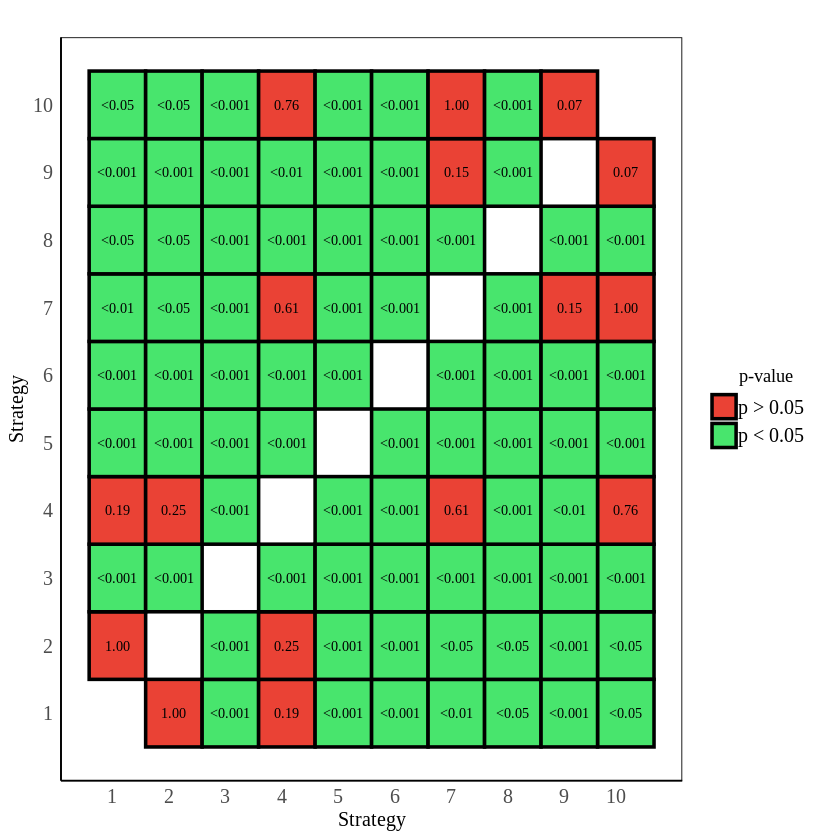

In [ ]:
# Load necessary libraries
library(ggplot2)
library(scales)

# Convert x and y to factors with the desired order
df_contrasts <- transform(df_contrasts,
                          x = as.numeric(gsub("Strat", "", sapply(strsplit(as.character(contrast), " - "), "[[", 1))),
                          y = as.numeric(gsub("Strat", "", sapply(strsplit(as.character(contrast), " - "), "[[", 2))))

# Reordering columns
df_contrasts <- df_contrasts[, c("x", "y", "p.value")]

# Create mirrored data
df_mirrored <- rbind(df_contrasts, transform(df_contrasts, x = y, y = x))

# Create function to format p-values
# Create function to format p-values
format_pvalue <- function(pvalue) {
  if (is.numeric(pvalue)) {
    ifelse(pvalue < 0.001, "<0.001",
           ifelse(pvalue < 0.01, "<0.01",
                  ifelse(pvalue < 0.05, "<0.05", sprintf("%.2f", pvalue))))
  } else {
    pvalue
  }
}

# Set font sizes
font_size_text <- 3  # Adjust font size for values in the heatmap
font_size_axes <- 12  # Adjust font size for axes labels

# Create a custom color palette
my_colors <- c("#EA4235", "#48E56D")

# Create heatmap with borders and a distinct color palette
plot <- ggplot(df_mirrored, aes(x = x, y = y, fill = p.value < 0.05)) +
  geom_tile(color = "black", size = 1) +  # Add borders around cells
  geom_text(aes(label = format_pvalue(p.value)), size = font_size_text, vjust = 0.5, hjust = 0.5, color = "black", family = "Times New Roman") +  # Center text
  scale_fill_manual(values = c("#EA4235", "#48E56D"), labels = c("p > 0.05", "p < 0.05"), name = "p-value") +  # Assign colors and labels
  labs(x = "Strategy",
       y = "Strategy",
       fill = NULL,
       title = " ",) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 1, size = font_size_axes, family = "Times New Roman"),  # Adjust font size for x axis labels
        axis.text.y = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for y axis labels
        axis.title.x = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for x axis title
        axis.title.y = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for y axis title
        legend.title = element_text(family = "Times New Roman", hjust = 0.5),  # Set legend title font and center it
        legend.title.align = 0.5,  # Center the legend title
        legend.text = element_text(size = font_size_axes, family = "Times New Roman", margin = margin(0, 10, 0, 0)),  # Adjust legend text size and margin
        panel.grid = element_blank(),  # Remove grid lines
        panel.border = element_rect(color = "black", fill = NA),  # Add border around plot
        axis.line = element_line(color = "black"),
        plot.title = element_text(hjust = 0.5, family = "Times New Roman"),
        plot.caption = element_text(hjust = 0.5, family = "Times New Roman")) +  # Center the title
  scale_x_continuous(breaks = seq(min(df_mirrored$x), max(df_mirrored$x), by = 1)) +
  scale_y_continuous(breaks = seq(min(df_mirrored$y), max(df_mirrored$y), by = 1))

# Save the plot as a scalable vector graphic (SVG) with higher resolution
plot
ggsave("HeatmapFull.svg", plot, width = 8, height = 6, dpi = 300)

## English Full

### 2.0 Load Data

In [ ]:
#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all tasks
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullAB.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all Task A and Task B for English ONLY
data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullABEnglish.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all Task A and Task B for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullABSpanish.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task A for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajEnglishA.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task B for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajEnglishB.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task A for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajSpanishA.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task B for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajSpanishB.csv")

In [ ]:
# Set excel path for the data to be written
excel <- "ajfullABEnglish.xlsx"

### 2.1 Fit Ordinal Model

In [ ]:
# library(ordinal)

# # Convert Likert to factor
# data$Likert <- factor(data$Likert)

# # Fit the Ordinal Regression Model
# o <- clm(Likert ~ Strategy,
#          data = data)
# # Check summary of model
# summary(o)

In [ ]:
library(ordinal)
library(broom)
library(writexl)
library(readxl)
library(openxlsx)

# Convert Likert to factor
data$Likert <- factor(data$Likert)

# Fit the Ordinal Regression Model
o <- clm(Likert ~ Strategy + Assistant + Task, data = data)

# Extract coefficients and related information
coefficients_df <- tidy(o)

# Extract Odds Ratios and Confidence Intervals
odds_ratio <- exp(coef(o))
conf_intervals <- exp(confint.default(o))

# Create a dataframe
effect <- rownames(coefficients_df)
coefficient <- coefficients_df$estimate
std_error <- coefficients_df$std.error
z_value <- coefficients_df$statistic
p_value <- coefficients_df$p.value
odds_ratio_val <- odds_ratio
ci_lower <- conf_intervals[, "2.5 %"]
ci_upper <- conf_intervals[, "97.5 %"]

# Combine into a dataframe
result_df <- data.frame(
  Effect = effect,
  Coefficient = round(coefficient, 2),
  `Std. Error` = round(std_error, 2),
  `Z Value` = round(z_value, 2),
  `P Value` = ifelse(p_value < 0.001, "<0.001***", ifelse(p_value < 0.01, "<0.01**", ifelse(p_value < 0.05, "<0.05*", round(p_value, 2)))),
  `Odds Ratio` = round(odds_ratio_val, 2),
  `CI Lower` = round(ci_lower, 2),
  `CI Upper` = round(ci_upper, 2)
)

# Extract main effects coefficients and related information
main_effects <- coefficients_df[grepl("Strategy|Assistant|Task", coefficients_df$term) & !grepl(":", coefficients_df$term), ]

# Extract main effects Odds Ratios and Confidence Intervals
main_odds_ratio <- exp(coef(o)[grepl("Strategy|Assistant|Task", names(coef(o))) & !grepl(":", names(coef(o)))])
main_conf_intervals <- exp(confint.default(o)[grepl("Strategy|Assistant|Task", names(coef(o))) & !grepl(":", names(coef(o))), ])

# Create a dataframe for main effects
main_effects_df <- data.frame(
  Effect = main_effects$term,
  Coefficient = round(main_effects$estimate, 2),
  `Std. Error` = round(main_effects$std.error, 2),
  `Z Value` = round(main_effects$statistic, 2),
  `P Value` = ifelse(main_effects$p.value < 0.001, "<0.001***", ifelse(main_effects$p.value < 0.01, "<0.01**", ifelse(main_effects$p.value < 0.05, "<0.05*", round(main_effects$p.value, 2)))),
  `Odds Ratio` = round(main_odds_ratio, 2),
  `CI Lower` = round(main_conf_intervals[, "2.5 %"], 2),
  `CI Upper` = round(main_conf_intervals[, "97.5 %"], 2)
)

# Modify Effect labels for Main Effects
main_effects_df$Effect <- gsub("StrategyStrat", "Strategy ", main_effects_df$Effect)
main_effects_df$Effect <- gsub("AssistantSiri", "Siri", main_effects_df$Effect)

# Add "Strategy 1" with a coefficient of 0 to main effects
main_effects_df <- rbind(main_effects_df, data.frame(Effect = "Strategy 1", Coefficient = 0, `Std. Error` = NA, `Z Value` = NA, `P Value` = NA, `Odds Ratio` = NA, `CI Lower` = NA, `CI Upper` = NA))

# Order main effects dataframe by Coefficient in descending order
main_effects_df <- main_effects_df[order(-main_effects_df$Coefficient), ]

# Print the modified main effects dataframe
main_effects_df

# Extract interaction effects coefficients and related information
interaction_effects <- coefficients_df[grepl(":", coefficients_df$term), ]

# Extract interaction effects Odds Ratios and Confidence Intervals
interaction_odds_ratio <- exp(coef(o)[grepl(":", names(coef(o)))])
interaction_conf_intervals <- exp(confint.default(o)[grepl(":", names(coef(o))), ])

# Create a dataframe for interaction effects
interaction_effects_df <- data.frame(
  Effect = interaction_effects$term,
  Coefficient = round(interaction_effects$estimate, 2),
  `Std. Error` = round(interaction_effects$std.error, 2),
  `Z Value` = round(interaction_effects$statistic, 2),
  `P Value` = ifelse(interaction_effects$p.value < 0.001, "<0.001***", ifelse(interaction_effects$p.value < 0.01, "<0.01**", ifelse(interaction_effects$p.value < 0.05, "<0.05*", round(interaction_effects$p.value, 2)))),
  `Odds Ratio` = round(interaction_odds_ratio, 2),
  `CI Lower` = round(interaction_conf_intervals[, "2.5 %"], 2),
  `CI Upper` = round(interaction_conf_intervals[, "97.5 %"], 2)
)

# Modify Effect labels for Interaction Effects
interaction_effects_df$Effect <- gsub(":AssistantSiri", " - Siri", interaction_effects_df$Effect)
interaction_effects_df$Effect <- gsub("StrategyStrat", "Strategy ", interaction_effects_df$Effect)
interaction_effects_df$Effect <- gsub("AssistantSiri", "Siri", interaction_effects_df$Effect)

# Add "Strategy 1 - Siri" with a coefficient of 0 to interaction effects
interaction_effects_df <- rbind(interaction_effects_df, data.frame(Effect = "Strategy 1 - Siri", Coefficient = 0, `Std. Error` = NA, `Z Value` = NA, `P Value` = NA, `Odds Ratio` = NA, `CI Lower` = NA, `CI Upper` = NA))

# Order interaction effects dataframe by Coefficient in descending order
interaction_effects_df <- interaction_effects_df[order(-interaction_effects_df$Coefficient), ]

# Print the modified interaction effects dataframe
interaction_effects_df

# Create a workbook
wb <- createWorkbook()

# Add main_effects_df to the workbook
addWorksheet(wb, "Main Effects")
writeData(wb, "Main Effects", main_effects_df)

# Add interaction_effects_df to the workbook
addWorksheet(wb, "Interaction Effects")
writeData(wb, "Interaction Effects", interaction_effects_df)

# Save the workbook to Excel file
saveWorkbook(wb, file = excel, overwrite = TRUE)

# Confirm completion
cat("Dataframes written to 'excel' successfully!\n")

,Effect,Coefficient,Std..Error,Z.Value,P.Value,Odds.Ratio,CI.Lower,CI.Upper
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
StrategyStrat5,Strategy 5,1.87,0.20,9.27,<0.001***,6.50,4.38,9.66
StrategyStrat3,Strategy 3,1.24,0.19,6.55,<0.001***,3.47,2.39,5.03
StrategyStrat8,Strategy 8,0.73,0.18,4.03,<0.001***,2.08,1.46,2.97
TaskB,TaskB,0.51,0.08,6.14,<0.001***,1.66,1.41,1.95
StrategyStrat2,Strategy 2,0.48,0.19,2.57,<0.05*,1.61,1.12,2.33
StrategyStrat10,Strategy 10,0.18,0.18,1.03,0.3,1.20,0.85,1.71
AssistantSiri,Siri,0.11,0.08,1.35,0.18,1.12,0.95,1.31
1,Strategy 1,0.00,NA,NA,NA,NA,NA,NA
StrategyStrat9,Strategy 9,-0.17,0.18,-0.98,0.33,0.84,0.59,1.19


,Effect,Coefficient,Std..Error,Z.Value,P.Value,Odds.Ratio,CI.Lower,CI.Upper
,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,Strategy 1 - Siri,0,NA,NA,NA,NA,NA,NA


Dataframes written to 'excel' successfully!


### 2.2 Pairwise Comparisons for Strategies

In [ ]:
library(emmeans)

# Calculate Estimated Marginal Means for Strategy variable
emm_strategy <- emmeans(o, pairwise ~ Strategy)

# Extract the results
results <- summary(emm_strategy, adjust = "holm")

# Convert the contrasts table to a dataframe
df_contrasts <- as.data.frame(results$contrasts)

# Create a function to format P values
format_pvalue <- function(p_value) {
  if (p_value < 0.001) {
    return("<0.001***")
  } else if (p_value < 0.01) {
    return("<0.01**")
  } else if (p_value < 0.05) {
    return("<0.05*")
  } else {
    return(paste0("", round(p_value, 4)))
  }
}

# Create dataframe for pairwise comparisons
df_pairwise <- data.frame(
  Effect = df_contrasts$contrast,
  Coefficient = round(df_contrasts$estimate, 2),
  `Std. Error` = round(df_contrasts$SE, 2),
  `Z Value` = round(df_contrasts$z.ratio, 2),
  `P Value` = sapply(df_contrasts$p.value, format_pvalue),
  Odds_Ratio = round(exp(df_contrasts$estimate), 2),
  CI_Lower = round(exp(df_contrasts$estimate - 1.96 * df_contrasts$SE), 2),
  CI_Upper = round(exp(df_contrasts$estimate + 1.96 * df_contrasts$SE), 2)
)

# Print the new pairwise dataframe
print(df_pairwise)

# Load the existing workbook
wb <- loadWorkbook(excel)

# Add a new sheet to the existing workbook
addWorksheet(wb, "Pairwise_Comparisons")

# Write the dataframe to the new sheet in the existing workbook
writeData(wb, sheet = "Pairwise_Comparisons", x = df_pairwise)

# Save the workbook with the new sheet, overwriting the existing file
saveWorkbook(wb, excel, overwrite = TRUE)

             Effect Coefficient Std..Error Z.Value   P.Value Odds_Ratio
1  Strat1 - Strat10       -0.18       0.18   -1.03         1       0.83
2   Strat1 - Strat2       -0.48       0.19   -2.57    0.1231       0.62
3   Strat1 - Strat3       -1.24       0.19   -6.55 <0.001***       0.29
4   Strat1 - Strat4        0.36       0.18    1.98     0.426       1.43
5   Strat1 - Strat5       -1.87       0.20   -9.27 <0.001***       0.15
6   Strat1 - Strat6        0.67       0.18    3.76   <0.01**       1.96
7   Strat1 - Strat7        0.56       0.18    3.08    <0.05*       1.74
8   Strat1 - Strat8       -0.73       0.18   -4.03   <0.01**       0.48
9   Strat1 - Strat9        0.17       0.18    0.98         1       1.19
10 Strat10 - Strat2       -0.29       0.18   -1.60    0.7646       0.74
11 Strat10 - Strat3       -1.06       0.19   -5.66 <0.001***       0.35
12 Strat10 - Strat4        0.54       0.18    3.04    <0.05*       1.72
13 Strat10 - Strat5       -1.69       0.20   -8.46 <0.001***    

### 2.3 Create Heatmap for Strategies

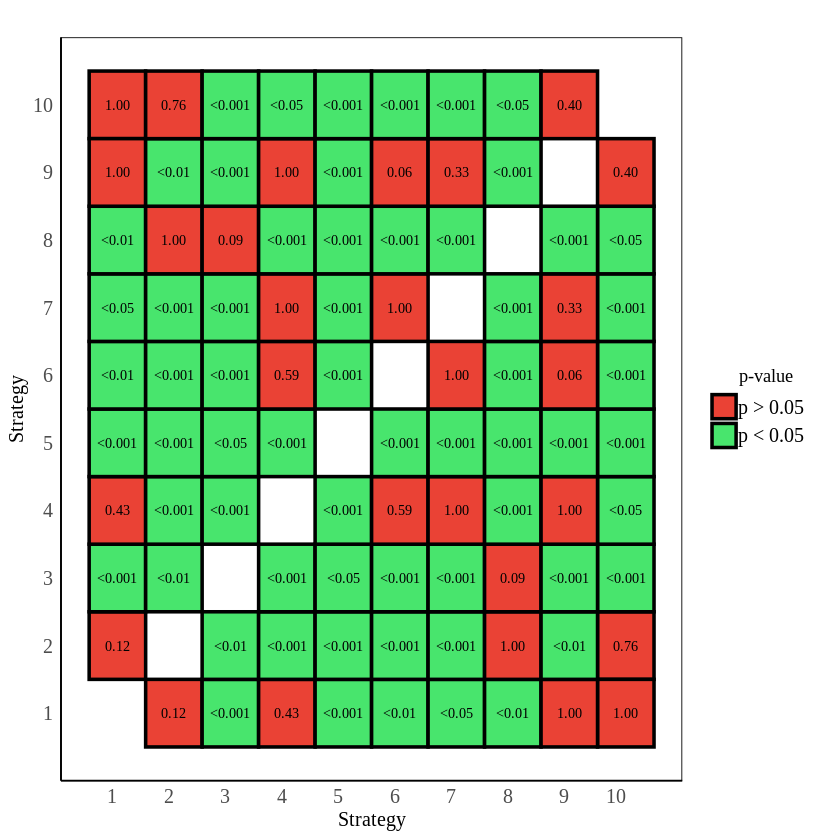

In [ ]:
# Load necessary libraries
library(ggplot2)
library(scales)

# Convert x and y to factors with the desired order
df_contrasts <- transform(df_contrasts,
                          x = as.numeric(gsub("Strat", "", sapply(strsplit(as.character(contrast), " - "), "[[", 1))),
                          y = as.numeric(gsub("Strat", "", sapply(strsplit(as.character(contrast), " - "), "[[", 2))))

# Reordering columns
df_contrasts <- df_contrasts[, c("x", "y", "p.value")]

# Create mirrored data
df_mirrored <- rbind(df_contrasts, transform(df_contrasts, x = y, y = x))

# Create function to format p-values
# Create function to format p-values
format_pvalue <- function(pvalue) {
  if (is.numeric(pvalue)) {
    ifelse(pvalue < 0.001, "<0.001",
           ifelse(pvalue < 0.01, "<0.01",
                  ifelse(pvalue < 0.05, "<0.05", sprintf("%.2f", pvalue))))
  } else {
    pvalue
  }
}

# Set font sizes
font_size_text <- 3  # Adjust font size for values in the heatmap
font_size_axes <- 12  # Adjust font size for axes labels

# Create a custom color palette
my_colors <- c("#EA4235", "#48E56D")

# Create heatmap with borders and a distinct color palette
plot <- ggplot(df_mirrored, aes(x = x, y = y, fill = p.value < 0.05)) +
  geom_tile(color = "black", size = 1) +  # Add borders around cells
  geom_text(aes(label = format_pvalue(p.value)), size = font_size_text, vjust = 0.5, hjust = 0.5, color = "black", family = "Times New Roman") +  # Center text
  scale_fill_manual(values = c("#EA4235", "#48E56D"), labels = c("p > 0.05", "p < 0.05"), name = "p-value") +  # Assign colors and labels
  labs(x = "Strategy",
       y = "Strategy",
       fill = NULL,
       title = " ",) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 1, size = font_size_axes, family = "Times New Roman"),  # Adjust font size for x axis labels
        axis.text.y = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for y axis labels
        axis.title.x = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for x axis title
        axis.title.y = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for y axis title
        legend.title = element_text(family = "Times New Roman", hjust = 0.5),  # Set legend title font and center it
        legend.title.align = 0.5,  # Center the legend title
        legend.text = element_text(size = font_size_axes, family = "Times New Roman", margin = margin(0, 10, 0, 0)),  # Adjust legend text size and margin
        panel.grid = element_blank(),  # Remove grid lines
        panel.border = element_rect(color = "black", fill = NA),  # Add border around plot
        axis.line = element_line(color = "black"),
        plot.title = element_text(hjust = 0.5, family = "Times New Roman"),
        plot.caption = element_text(hjust = 0.5, family = "Times New Roman")) +  # Center the title
  scale_x_continuous(breaks = seq(min(df_mirrored$x), max(df_mirrored$x), by = 1)) +
  scale_y_continuous(breaks = seq(min(df_mirrored$y), max(df_mirrored$y), by = 1))

# Save the plot as a scalable vector graphic (SVG) with higher resolution
plot
ggsave("HeatmapEnglishFull.svg", plot, width = 8, height = 6, dpi = 300)

## English A

### 2.0 Load Data

In [ ]:
#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all tasks
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullAB.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all Task A and Task B for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullABEnglish.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all Task A and Task B for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullABSpanish.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task A for English ONLY
data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajEnglishA.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task B for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajEnglishB.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task A for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajSpanishA.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task B for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajSpanishB.csv")

In [ ]:
# Set excel path for the data to be written
excel <- "ajEnglishA.xlsx"

### 2.1 Fit Ordinal Model

In [ ]:
# library(ordinal)

# # Convert Likert to factor
# data$Likert <- factor(data$Likert)

# # Fit the Ordinal Regression Model
# o <- clm(Likert ~ Strategy,
#          data = data)
# # Check summary of model
# summary(o)

In [ ]:
library(ordinal)
library(broom)
library(writexl)

# Convert Likert to factor
data$Likert <- factor(data$Likert)

# Fit the Ordinal Regression Model
o <- clm(Likert ~ Strategy + Assistant, data = data)

# Extract coefficients and related information
coefficients_df <- tidy(o)

# Extract Odds Ratios and Confidence Intervals
odds_ratio <- exp(coef(o))
conf_intervals <- exp(confint.default(o))

# Create a dataframe
effect <- rownames(coefficients_df)
coefficient <- coefficients_df$estimate
std_error <- coefficients_df$std.error
z_value <- coefficients_df$statistic
p_value <- coefficients_df$p.value
odds_ratio_val <- odds_ratio
ci_lower <- conf_intervals[, "2.5 %"]
ci_upper <- conf_intervals[, "97.5 %"]

# Combine into a dataframe
result_df <- data.frame(
  Effect = effect,
  Coefficient = round(coefficient, 2),
  `Std. Error` = round(std_error, 2),
  `Z Value` = round(z_value, 2),
  `P Value` = ifelse(p_value < 0.001, "<0.001***", ifelse(p_value < 0.01, "<0.01**", ifelse(p_value < 0.05, "<0.05*", round(p_value, 2)))),
  `Odds Ratio` = round(odds_ratio_val, 2),
  `CI Lower` = round(ci_lower, 2),
  `CI Upper` = round(ci_upper, 2)
)

# Extract main effects coefficients and related information
main_effects <- coefficients_df[grepl("Strategy|Assistant", coefficients_df$term) & !grepl(":", coefficients_df$term), ]

# Extract main effects Odds Ratios and Confidence Intervals
main_odds_ratio <- exp(coef(o)[grepl("Strategy|Assistant", names(coef(o))) & !grepl(":", names(coef(o)))])
main_conf_intervals <- exp(confint.default(o)[grepl("Strategy|Assistant", names(coef(o))) & !grepl(":", names(coef(o))), ])

# Create a dataframe for main effects
main_effects_df <- data.frame(
  Effect = main_effects$term,
  Coefficient = round(main_effects$estimate, 2),
  `Std. Error` = round(main_effects$std.error, 2),
  `Z Value` = round(main_effects$statistic, 2),
  `P Value` = ifelse(main_effects$p.value < 0.001, "<0.001***", ifelse(main_effects$p.value < 0.01, "<0.01**", ifelse(main_effects$p.value < 0.05, "<0.05*", round(main_effects$p.value, 2)))),
  `Odds Ratio` = round(main_odds_ratio, 2),
  `CI Lower` = round(main_conf_intervals[, "2.5 %"], 2),
  `CI Upper` = round(main_conf_intervals[, "97.5 %"], 2)
)

# Modify Effect labels for Main Effects
main_effects_df$Effect <- gsub("StrategyStrat", "Strategy ", main_effects_df$Effect)
main_effects_df$Effect <- gsub("AssistantSiri", "Siri", main_effects_df$Effect)

# Add "Strategy 1" with a coefficient of 0 to main effects
main_effects_df <- rbind(main_effects_df, data.frame(Effect = "Strategy 1", Coefficient = 0, `Std. Error` = NA, `Z Value` = NA, `P Value` = NA, `Odds Ratio` = NA, `CI Lower` = NA, `CI Upper` = NA))

# Order main effects dataframe by Coefficient in descending order
main_effects_df <- main_effects_df[order(-main_effects_df$Coefficient), ]

# Print the modified main effects dataframe
main_effects_df

# Extract interaction effects coefficients and related information
interaction_effects <- coefficients_df[grepl(":", coefficients_df$term), ]

# Extract interaction effects Odds Ratios and Confidence Intervals
interaction_odds_ratio <- exp(coef(o)[grepl(":", names(coef(o)))])
interaction_conf_intervals <- exp(confint.default(o)[grepl(":", names(coef(o))), ])

# Create a dataframe for interaction effects
interaction_effects_df <- data.frame(
  Effect = interaction_effects$term,
  Coefficient = round(interaction_effects$estimate, 2),
  `Std. Error` = round(interaction_effects$std.error, 2),
  `Z Value` = round(interaction_effects$statistic, 2),
  `P Value` = ifelse(interaction_effects$p.value < 0.001, "<0.001***", ifelse(interaction_effects$p.value < 0.01, "<0.01**", ifelse(interaction_effects$p.value < 0.05, "<0.05*", round(interaction_effects$p.value, 2)))),
  `Odds Ratio` = round(interaction_odds_ratio, 2),
  `CI Lower` = round(interaction_conf_intervals[, "2.5 %"], 2),
  `CI Upper` = round(interaction_conf_intervals[, "97.5 %"], 2)
)

# Modify Effect labels for Interaction Effects
interaction_effects_df$Effect <- gsub(":AssistantSiri", " - Siri", interaction_effects_df$Effect)
interaction_effects_df$Effect <- gsub("StrategyStrat", "Strategy ", interaction_effects_df$Effect)
interaction_effects_df$Effect <- gsub("AssistantSiri", "Siri", interaction_effects_df$Effect)

# Add "Strategy 1 - Siri" with a coefficient of 0 to interaction effects
interaction_effects_df <- rbind(interaction_effects_df, data.frame(Effect = "Strategy 1 - Siri", Coefficient = 0, `Std. Error` = NA, `Z Value` = NA, `P Value` = NA, `Odds Ratio` = NA, `CI Lower` = NA, `CI Upper` = NA))

# Order interaction effects dataframe by Coefficient in descending order
interaction_effects_df <- interaction_effects_df[order(-interaction_effects_df$Coefficient), ]

# Print the modified interaction effects dataframe
interaction_effects_df

# Create a workbook
wb <- createWorkbook()

# Add main_effects_df to the workbook
addWorksheet(wb, "Main Effects")
writeData(wb, "Main Effects", main_effects_df)

# Add interaction_effects_df to the workbook
addWorksheet(wb, "Interaction Effects")
writeData(wb, "Interaction Effects", interaction_effects_df)

# Save the workbook to Excel file
saveWorkbook(wb, file = excel, overwrite = TRUE)

# Confirm completion
cat("Dataframes written to 'excel' successfully!\n")

,Effect,Coefficient,Std..Error,Z.Value,P.Value,Odds.Ratio,CI.Lower,CI.Upper
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
StrategyStrat5,Strategy 5,1.85,0.27,6.90,<0.001***,6.37,3.76,10.77
StrategyStrat3,Strategy 3,1.23,0.26,4.76,<0.001***,3.44,2.07,5.72
StrategyStrat8,Strategy 8,0.62,0.25,2.52,<0.05*,1.86,1.15,3.02
StrategyStrat2,Strategy 2,0.48,0.26,1.86,0.06,1.62,0.98,2.69
StrategyStrat10,Strategy 10,0.47,0.25,1.89,0.06,1.60,0.98,2.59
StrategyStrat9,Strategy 9,0.39,0.24,1.59,0.11,1.47,0.91,2.37
AssistantSiri,Siri,0.33,0.11,2.92,<0.01**,1.40,1.12,1.75
StrategyStrat6,Strategy 6,0.14,0.24,0.58,0.56,1.15,0.71,1.86
1,Strategy 1,0.00,NA,NA,NA,NA,NA,NA


,Effect,Coefficient,Std..Error,Z.Value,P.Value,Odds.Ratio,CI.Lower,CI.Upper
,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,Strategy 1 - Siri,0,NA,NA,NA,NA,NA,NA


Dataframes written to 'excel' successfully!


### 2.2 Pairwise Comparisons for Strategies

In [ ]:
library(emmeans)

# Calculate Estimated Marginal Means for Strategy variable
emm_strategy <- emmeans(o, pairwise ~ Strategy)

# Extract the results
results <- summary(emm_strategy, adjust = "holm")

# Convert the contrasts table to a dataframe
df_contrasts <- as.data.frame(results$contrasts)

# Create a function to format P values
format_pvalue <- function(p_value) {
  if (p_value < 0.001) {
    return("<0.001***")
  } else if (p_value < 0.01) {
    return("<0.01**")
  } else if (p_value < 0.05) {
    return("<0.05*")
  } else {
    return(paste0("", round(p_value, 4)))
  }
}

# Create dataframe for pairwise comparisons
df_pairwise <- data.frame(
  Effect = df_contrasts$contrast,
  Coefficient = round(df_contrasts$estimate, 2),
  `Std. Error` = round(df_contrasts$SE, 2),
  `Z Value` = round(df_contrasts$z.ratio, 2),
  `P Value` = sapply(df_contrasts$p.value, format_pvalue),
  Odds_Ratio = round(exp(df_contrasts$estimate), 2),
  CI_Lower = round(exp(df_contrasts$estimate - 1.96 * df_contrasts$SE), 2),
  CI_Upper = round(exp(df_contrasts$estimate + 1.96 * df_contrasts$SE), 2)
)

# Print the new pairwise dataframe
print(df_pairwise)

# Load the existing workbook
wb <- loadWorkbook(excel)

# Add a new sheet to the existing workbook
addWorksheet(wb, "Pairwise_Comparisons")

# Write the dataframe to the new sheet in the existing workbook
writeData(wb, sheet = "Pairwise_Comparisons", x = df_pairwise)

# Save the workbook with the new sheet, overwriting the existing file
saveWorkbook(wb, excel, overwrite = TRUE)

             Effect Coefficient Std..Error Z.Value   P.Value Odds_Ratio
1  Strat1 - Strat10       -0.47       0.25   -1.89         1       0.63
2   Strat1 - Strat2       -0.48       0.26   -1.86         1       0.62
3   Strat1 - Strat3       -1.23       0.26   -4.76 <0.001***       0.29
4   Strat1 - Strat4        0.34       0.25    1.34         1       1.40
5   Strat1 - Strat5       -1.85       0.27   -6.90 <0.001***       0.16
6   Strat1 - Strat6       -0.14       0.24   -0.58         1       0.87
7   Strat1 - Strat7        0.04       0.25    0.18         1       1.05
8   Strat1 - Strat8       -0.62       0.25   -2.52    0.2898       0.54
9   Strat1 - Strat9       -0.39       0.24   -1.59         1       0.68
10 Strat10 - Strat2       -0.01       0.26   -0.05         1       0.99
11 Strat10 - Strat3       -0.77       0.26   -2.95    0.0922       0.46
12 Strat10 - Strat4        0.81       0.25    3.17    <0.05*       2.24
13 Strat10 - Strat5       -1.38       0.27   -5.15 <0.001***    

### 2.3 Create Heatmap for Strategies

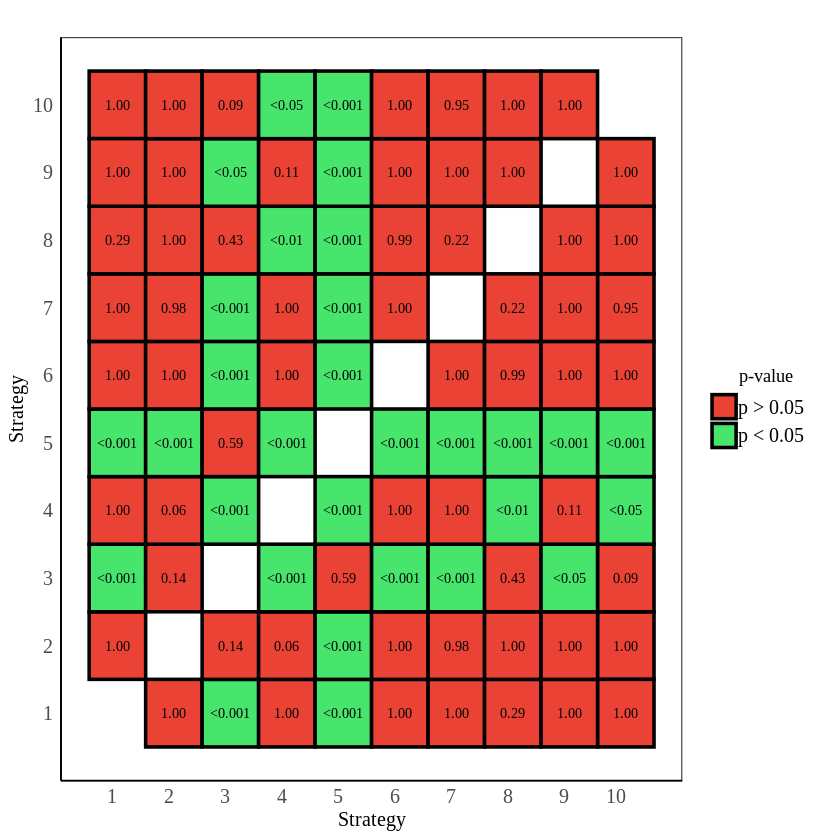

In [ ]:
# Load necessary libraries
library(ggplot2)
library(scales)

# Convert x and y to factors with the desired order
df_contrasts <- transform(df_contrasts,
                          x = as.numeric(gsub("Strat", "", sapply(strsplit(as.character(contrast), " - "), "[[", 1))),
                          y = as.numeric(gsub("Strat", "", sapply(strsplit(as.character(contrast), " - "), "[[", 2))))

# Reordering columns
df_contrasts <- df_contrasts[, c("x", "y", "p.value")]

# Create mirrored data
df_mirrored <- rbind(df_contrasts, transform(df_contrasts, x = y, y = x))

# Create function to format p-values
# Create function to format p-values
format_pvalue <- function(pvalue) {
  if (is.numeric(pvalue)) {
    ifelse(pvalue < 0.001, "<0.001",
           ifelse(pvalue < 0.01, "<0.01",
                  ifelse(pvalue < 0.05, "<0.05", sprintf("%.2f", pvalue))))
  } else {
    pvalue
  }
}

# Set font sizes
font_size_text <- 3  # Adjust font size for values in the heatmap
font_size_axes <- 12  # Adjust font size for axes labels

# Create a custom color palette
my_colors <- c("#EA4235", "#48E56D")

# Create heatmap with borders and a distinct color palette
plot <- ggplot(df_mirrored, aes(x = x, y = y, fill = p.value < 0.05)) +
  geom_tile(color = "black", size = 1) +  # Add borders around cells
  geom_text(aes(label = format_pvalue(p.value)), size = font_size_text, vjust = 0.5, hjust = 0.5, color = "black", family = "Times New Roman") +  # Center text
  scale_fill_manual(values = c("#EA4235", "#48E56D"), labels = c("p > 0.05", "p < 0.05"), name = "p-value") +  # Assign colors and labels
  labs(x = "Strategy",
       y = "Strategy",
       fill = NULL,
       title = " ",) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 1, size = font_size_axes, family = "Times New Roman"),  # Adjust font size for x axis labels
        axis.text.y = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for y axis labels
        axis.title.x = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for x axis title
        axis.title.y = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for y axis title
        legend.title = element_text(family = "Times New Roman", hjust = 0.5),  # Set legend title font and center it
        legend.title.align = 0.5,  # Center the legend title
        legend.text = element_text(size = font_size_axes, family = "Times New Roman", margin = margin(0, 10, 0, 0)),  # Adjust legend text size and margin
        panel.grid = element_blank(),  # Remove grid lines
        panel.border = element_rect(color = "black", fill = NA),  # Add border around plot
        axis.line = element_line(color = "black"),
        plot.title = element_text(hjust = 0.5, family = "Times New Roman"),
        plot.caption = element_text(hjust = 0.5, family = "Times New Roman")) +  # Center the title
  scale_x_continuous(breaks = seq(min(df_mirrored$x), max(df_mirrored$x), by = 1)) +
  scale_y_continuous(breaks = seq(min(df_mirrored$y), max(df_mirrored$y), by = 1))

# Save the plot as a scalable vector graphic (SVG) with higher resolution
plot
ggsave("HeatmapEnglishA.svg", plot, width = 8, height = 6, dpi = 300)

## English B


### 2.0 Load Data

In [ ]:
#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all tasks
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullAB.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all Task A and Task B for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullABEnglish.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all Task A and Task B for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullABSpanish.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task A for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajEnglishA.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task B for English ONLY
data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajEnglishB.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task A for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajSpanishA.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task B for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajSpanishB.csv")

In [ ]:
# Set excel path for the data to be written
excel <- "ajEnglishB.xlsx"

### 2.1 Fit Ordinal Model

In [ ]:
# library(ordinal)

# # Convert Likert to factor
# data$Likert <- factor(data$Likert)

# # Fit the Ordinal Regression Model
# o <- clm(Likert ~ Strategy,
#          data = data)
# # Check summary of model
# summary(o)

In [ ]:
library(ordinal)
library(broom)
library(writexl)

# Convert Likert to factor
data$Likert <- factor(data$Likert)

# Fit the Ordinal Regression Model
o <- clm(Likert ~ Strategy + Assistant, data = data)

# Extract coefficients and related information
coefficients_df <- tidy(o)

# Extract Odds Ratios and Confidence Intervals
odds_ratio <- exp(coef(o))
conf_intervals <- exp(confint.default(o))

# Create a dataframe
effect <- rownames(coefficients_df)
coefficient <- coefficients_df$estimate
std_error <- coefficients_df$std.error
z_value <- coefficients_df$statistic
p_value <- coefficients_df$p.value
odds_ratio_val <- odds_ratio
ci_lower <- conf_intervals[, "2.5 %"]
ci_upper <- conf_intervals[, "97.5 %"]

# Combine into a dataframe
result_df <- data.frame(
  Effect = effect,
  Coefficient = round(coefficient, 2),
  `Std. Error` = round(std_error, 2),
  `Z Value` = round(z_value, 2),
  `P Value` = ifelse(p_value < 0.001, "<0.001***", ifelse(p_value < 0.01, "<0.01**", ifelse(p_value < 0.05, "<0.05*", round(p_value, 2)))),
  `Odds Ratio` = round(odds_ratio_val, 2),
  `CI Lower` = round(ci_lower, 2),
  `CI Upper` = round(ci_upper, 2)
)

# Extract main effects coefficients and related information
main_effects <- coefficients_df[grepl("Strategy|Assistant", coefficients_df$term) & !grepl(":", coefficients_df$term), ]

# Extract main effects Odds Ratios and Confidence Intervals
main_odds_ratio <- exp(coef(o)[grepl("Strategy|Assistant", names(coef(o))) & !grepl(":", names(coef(o)))])
main_conf_intervals <- exp(confint.default(o)[grepl("Strategy|Assistant", names(coef(o))) & !grepl(":", names(coef(o))), ])

# Create a dataframe for main effects
main_effects_df <- data.frame(
  Effect = main_effects$term,
  Coefficient = round(main_effects$estimate, 2),
  `Std. Error` = round(main_effects$std.error, 2),
  `Z Value` = round(main_effects$statistic, 2),
  `P Value` = ifelse(main_effects$p.value < 0.001, "<0.001***", ifelse(main_effects$p.value < 0.01, "<0.01**", ifelse(main_effects$p.value < 0.05, "<0.05*", round(main_effects$p.value, 2)))),
  `Odds Ratio` = round(main_odds_ratio, 2),
  `CI Lower` = round(main_conf_intervals[, "2.5 %"], 2),
  `CI Upper` = round(main_conf_intervals[, "97.5 %"], 2)
)

# Modify Effect labels for Main Effects
main_effects_df$Effect <- gsub("StrategyStrat", "Strategy ", main_effects_df$Effect)
main_effects_df$Effect <- gsub("AssistantSiri", "Siri", main_effects_df$Effect)

# Add "Strategy 1" with a coefficient of 0 to main effects
main_effects_df <- rbind(main_effects_df, data.frame(Effect = "Strategy 1", Coefficient = 0, `Std. Error` = NA, `Z Value` = NA, `P Value` = NA, `Odds Ratio` = NA, `CI Lower` = NA, `CI Upper` = NA))

# Order main effects dataframe by Coefficient in descending order
main_effects_df <- main_effects_df[order(-main_effects_df$Coefficient), ]

# Print the modified main effects dataframe
main_effects_df

# Extract interaction effects coefficients and related information
interaction_effects <- coefficients_df[grepl(":", coefficients_df$term), ]

# Extract interaction effects Odds Ratios and Confidence Intervals
interaction_odds_ratio <- exp(coef(o)[grepl(":", names(coef(o)))])
interaction_conf_intervals <- exp(confint.default(o)[grepl(":", names(coef(o))), ])

# Create a dataframe for interaction effects
interaction_effects_df <- data.frame(
  Effect = interaction_effects$term,
  Coefficient = round(interaction_effects$estimate, 2),
  `Std. Error` = round(interaction_effects$std.error, 2),
  `Z Value` = round(interaction_effects$statistic, 2),
  `P Value` = ifelse(interaction_effects$p.value < 0.001, "<0.001***", ifelse(interaction_effects$p.value < 0.01, "<0.01**", ifelse(interaction_effects$p.value < 0.05, "<0.05*", round(interaction_effects$p.value, 2)))),
  `Odds Ratio` = round(interaction_odds_ratio, 2),
  `CI Lower` = round(interaction_conf_intervals[, "2.5 %"], 2),
  `CI Upper` = round(interaction_conf_intervals[, "97.5 %"], 2)
)

# Modify Effect labels for Interaction Effects
interaction_effects_df$Effect <- gsub(":AssistantSiri", " - Siri", interaction_effects_df$Effect)
interaction_effects_df$Effect <- gsub("StrategyStrat", "Strategy ", interaction_effects_df$Effect)
interaction_effects_df$Effect <- gsub("AssistantSiri", "Siri", interaction_effects_df$Effect)

# Add "Strategy 1 - Siri" with a coefficient of 0 to interaction effects
interaction_effects_df <- rbind(interaction_effects_df, data.frame(Effect = "Strategy 1 - Siri", Coefficient = 0, `Std. Error` = NA, `Z Value` = NA, `P Value` = NA, `Odds Ratio` = NA, `CI Lower` = NA, `CI Upper` = NA))

# Order interaction effects dataframe by Coefficient in descending order
interaction_effects_df <- interaction_effects_df[order(-interaction_effects_df$Coefficient), ]

# Print the modified interaction effects dataframe
interaction_effects_df

# Create a workbook
wb <- createWorkbook()

# Add main_effects_df to the workbook
addWorksheet(wb, "Main Effects")
writeData(wb, "Main Effects", main_effects_df)

# Add interaction_effects_df to the workbook
addWorksheet(wb, "Interaction Effects")
writeData(wb, "Interaction Effects", interaction_effects_df)

# Save the workbook to Excel file
saveWorkbook(wb, file = excel, overwrite = TRUE)

# Confirm completion
cat("Dataframes written to 'excel' successfully!\n")

,Effect,Coefficient,Std..Error,Z.Value,P.Value,Odds.Ratio,CI.Lower,CI.Upper
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
StrategyStrat5,Strategy 5,1.99,0.32,6.29,<0.001***,7.29,3.92,13.53
StrategyStrat3,Strategy 3,1.28,0.28,4.52,<0.001***,3.59,2.06,6.25
StrategyStrat8,Strategy 8,0.89,0.27,3.27,<0.01**,2.43,1.43,4.13
StrategyStrat2,Strategy 2,0.46,0.27,1.70,0.09,1.59,0.93,2.71
1,Strategy 1,0.00,NA,NA,NA,NA,NA,NA
StrategyStrat10,Strategy 10,-0.14,0.26,-0.55,0.58,0.87,0.52,1.45
AssistantSiri,Siri,-0.14,0.12,-1.15,0.25,0.87,0.69,1.10
StrategyStrat4,Strategy 4,-0.46,0.26,-1.79,0.07,0.63,0.38,1.05
StrategyStrat9,Strategy 9,-0.80,0.26,-3.10,<0.01**,0.45,0.27,0.74


,Effect,Coefficient,Std..Error,Z.Value,P.Value,Odds.Ratio,CI.Lower,CI.Upper
,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,Strategy 1 - Siri,0,NA,NA,NA,NA,NA,NA


Dataframes written to 'excel' successfully!


### 2.2 Pairwise Comparisons for Strategies

In [ ]:
library(emmeans)

# Calculate Estimated Marginal Means for Strategy variable
emm_strategy <- emmeans(o, pairwise ~ Strategy)

# Extract the results
results <- summary(emm_strategy, adjust = "holm")

# Convert the contrasts table to a dataframe
df_contrasts <- as.data.frame(results$contrasts)

# Create a function to format P values
format_pvalue <- function(p_value) {
  if (p_value < 0.001) {
    return("<0.001***")
  } else if (p_value < 0.01) {
    return("<0.01**")
  } else if (p_value < 0.05) {
    return("<0.05*")
  } else {
    return(paste0("", round(p_value, 4)))
  }
}

# Create dataframe for pairwise comparisons
df_pairwise <- data.frame(
  Effect = df_contrasts$contrast,
  Coefficient = round(df_contrasts$estimate, 2),
  `Std. Error` = round(df_contrasts$SE, 2),
  `Z Value` = round(df_contrasts$z.ratio, 2),
  `P Value` = sapply(df_contrasts$p.value, format_pvalue),
  Odds_Ratio = round(exp(df_contrasts$estimate), 2),
  CI_Lower = round(exp(df_contrasts$estimate - 1.96 * df_contrasts$SE), 2),
  CI_Upper = round(exp(df_contrasts$estimate + 1.96 * df_contrasts$SE), 2)
)

# Print the new pairwise dataframe
print(df_pairwise)

# Load the existing workbook
wb <- loadWorkbook(excel)

# Add a new sheet to the existing workbook
addWorksheet(wb, "Pairwise_Comparisons")

# Write the dataframe to the new sheet in the existing workbook
writeData(wb, sheet = "Pairwise_Comparisons", x = df_pairwise)

# Save the workbook with the new sheet, overwriting the existing file
saveWorkbook(wb, excel, overwrite = TRUE)

             Effect Coefficient Std..Error Z.Value   P.Value Odds_Ratio
1  Strat1 - Strat10        0.14       0.26    0.55    0.8034       1.15
2   Strat1 - Strat2       -0.46       0.27   -1.70    0.6508       0.63
3   Strat1 - Strat3       -1.28       0.28   -4.52 <0.001***       0.28
4   Strat1 - Strat4        0.46       0.26    1.79    0.6508       1.59
5   Strat1 - Strat5       -1.99       0.32   -6.29 <0.001***       0.14
6   Strat1 - Strat6        1.61       0.26    6.09 <0.001***       4.99
7   Strat1 - Strat7        1.16       0.26    4.39 <0.001***       3.18
8   Strat1 - Strat8       -0.89       0.27   -3.27    <0.05*       0.41
9   Strat1 - Strat9        0.80       0.26    3.10    <0.05*       2.24
10 Strat10 - Strat2       -0.61       0.26   -2.29    0.2434       0.55
11 Strat10 - Strat3       -1.42       0.28   -5.16 <0.001***       0.24
12 Strat10 - Strat4        0.32       0.25    1.28    0.8034       1.38
13 Strat10 - Strat5       -2.13       0.31   -6.89 <0.001***    

### 2.3 Create Heatmap for Strategies

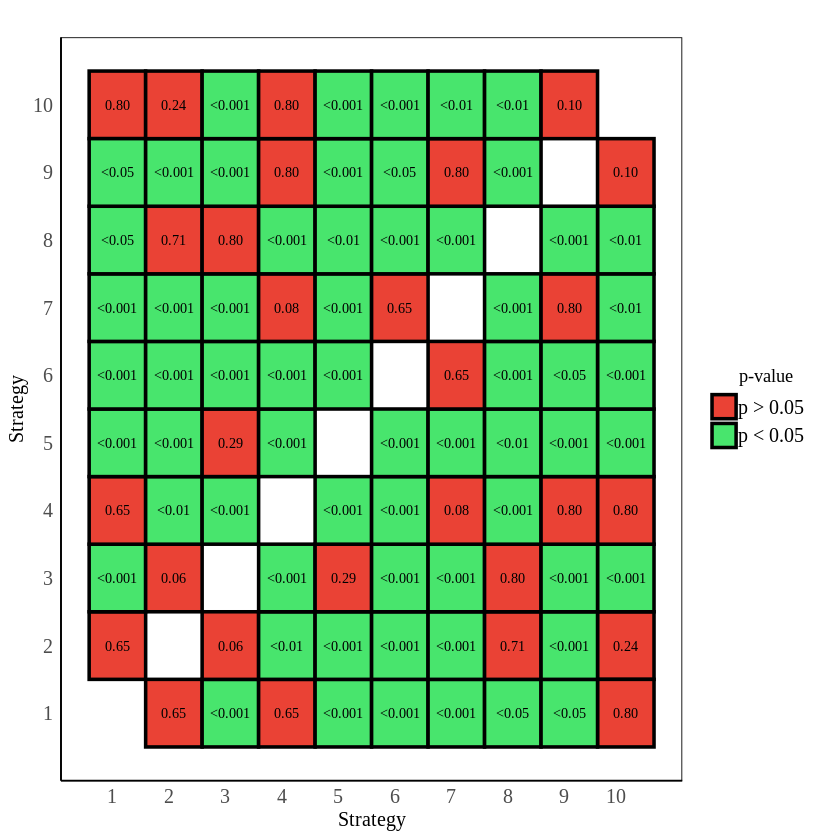

In [ ]:
# Load necessary libraries
library(ggplot2)
library(scales)

# Convert x and y to factors with the desired order
df_contrasts <- transform(df_contrasts,
                          x = as.numeric(gsub("Strat", "", sapply(strsplit(as.character(contrast), " - "), "[[", 1))),
                          y = as.numeric(gsub("Strat", "", sapply(strsplit(as.character(contrast), " - "), "[[", 2))))

# Reordering columns
df_contrasts <- df_contrasts[, c("x", "y", "p.value")]

# Create mirrored data
df_mirrored <- rbind(df_contrasts, transform(df_contrasts, x = y, y = x))

# Create function to format p-values
# Create function to format p-values
format_pvalue <- function(pvalue) {
  if (is.numeric(pvalue)) {
    ifelse(pvalue < 0.001, "<0.001",
           ifelse(pvalue < 0.01, "<0.01",
                  ifelse(pvalue < 0.05, "<0.05", sprintf("%.2f", pvalue))))
  } else {
    pvalue
  }
}

# Set font sizes
font_size_text <- 3  # Adjust font size for values in the heatmap
font_size_axes <- 12  # Adjust font size for axes labels

# Create a custom color palette
my_colors <- c("#EA4235", "#48E56D")

# Create heatmap with borders and a distinct color palette
plot <- ggplot(df_mirrored, aes(x = x, y = y, fill = p.value < 0.05)) +
  geom_tile(color = "black", size = 1) +  # Add borders around cells
  geom_text(aes(label = format_pvalue(p.value)), size = font_size_text, vjust = 0.5, hjust = 0.5, color = "black", family = "Times New Roman") +  # Center text
  scale_fill_manual(values = c("#EA4235", "#48E56D"), labels = c("p > 0.05", "p < 0.05"), name = "p-value") +  # Assign colors and labels
  labs(x = "Strategy",
       y = "Strategy",
       fill = NULL,
       title = " ",) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 1, size = font_size_axes, family = "Times New Roman"),  # Adjust font size for x axis labels
        axis.text.y = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for y axis labels
        axis.title.x = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for x axis title
        axis.title.y = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for y axis title
        legend.title = element_text(family = "Times New Roman", hjust = 0.5),  # Set legend title font and center it
        legend.title.align = 0.5,  # Center the legend title
        legend.text = element_text(size = font_size_axes, family = "Times New Roman", margin = margin(0, 10, 0, 0)),  # Adjust legend text size and margin
        panel.grid = element_blank(),  # Remove grid lines
        panel.border = element_rect(color = "black", fill = NA),  # Add border around plot
        axis.line = element_line(color = "black"),
        plot.title = element_text(hjust = 0.5, family = "Times New Roman"),
        plot.caption = element_text(hjust = 0.5, family = "Times New Roman")) +  # Center the title
  scale_x_continuous(breaks = seq(min(df_mirrored$x), max(df_mirrored$x), by = 1)) +
  scale_y_continuous(breaks = seq(min(df_mirrored$y), max(df_mirrored$y), by = 1))

# Save the plot as a scalable vector graphic (SVG) with higher resolution
plot
ggsave("HeatmapEnglishB.svg", plot, width = 8, height = 6, dpi = 300)

## Spanish Full


### 2.0 Load Data

In [ ]:
#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all tasks
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullAB.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all Task A and Task B for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullABEnglish.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all Task A and Task B for Spanish ONLY
data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullABSpanish.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task A for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajEnglishA.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task B for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajEnglishB.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task A for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajSpanishA.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task B for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajSpanishB.csv")

In [ ]:
# Set excel path for the data to be written
excel <- "ajfullABSpanish.xlsx"

### 2.1 Fit Ordinal Model

In [ ]:
# library(ordinal)

# # Convert Likert to factor
# data$Likert <- factor(data$Likert)

# # Fit the Ordinal Regression Model
# o <- clm(Likert ~ Strategy,
#          data = data)
# # Check summary of model
# summary(o)

In [ ]:
library(ordinal)
library(broom)
library(writexl)
library(readxl)
library(openxlsx)

# Convert Likert to factor
data$Likert <- factor(data$Likert)

# Fit the Ordinal Regression Model
o <- clm(Likert ~ Strategy + Assistant + Task, data = data)

# Extract coefficients and related information
coefficients_df <- tidy(o)

# Extract Odds Ratios and Confidence Intervals
odds_ratio <- exp(coef(o))
conf_intervals <- exp(confint.default(o))

# Create a dataframe
effect <- rownames(coefficients_df)
coefficient <- coefficients_df$estimate
std_error <- coefficients_df$std.error
z_value <- coefficients_df$statistic
p_value <- coefficients_df$p.value
odds_ratio_val <- odds_ratio
ci_lower <- conf_intervals[, "2.5 %"]
ci_upper <- conf_intervals[, "97.5 %"]

# Combine into a dataframe
result_df <- data.frame(
  Effect = effect,
  Coefficient = round(coefficient, 2),
  `Std. Error` = round(std_error, 2),
  `Z Value` = round(z_value, 2),
  `P Value` = ifelse(p_value < 0.001, "<0.001***", ifelse(p_value < 0.01, "<0.01**", ifelse(p_value < 0.05, "<0.05*", round(p_value, 2)))),
  `Odds Ratio` = round(odds_ratio_val, 2),
  `CI Lower` = round(ci_lower, 2),
  `CI Upper` = round(ci_upper, 2)
)

# Extract main effects coefficients and related information
main_effects <- coefficients_df[grepl("Strategy|Assistant|Task", coefficients_df$term) & !grepl(":", coefficients_df$term), ]

# Extract main effects Odds Ratios and Confidence Intervals
main_odds_ratio <- exp(coef(o)[grepl("Strategy|Assistant|Task", names(coef(o))) & !grepl(":", names(coef(o)))])
main_conf_intervals <- exp(confint.default(o)[grepl("Strategy|Assistant|Task", names(coef(o))) & !grepl(":", names(coef(o))), ])

# Create a dataframe for main effects
main_effects_df <- data.frame(
  Effect = main_effects$term,
  Coefficient = round(main_effects$estimate, 2),
  `Std. Error` = round(main_effects$std.error, 2),
  `Z Value` = round(main_effects$statistic, 2),
  `P Value` = ifelse(main_effects$p.value < 0.001, "<0.001***", ifelse(main_effects$p.value < 0.01, "<0.01**", ifelse(main_effects$p.value < 0.05, "<0.05*", round(main_effects$p.value, 2)))),
  `Odds Ratio` = round(main_odds_ratio, 2),
  `CI Lower` = round(main_conf_intervals[, "2.5 %"], 2),
  `CI Upper` = round(main_conf_intervals[, "97.5 %"], 2)
)

# Modify Effect labels for Main Effects
main_effects_df$Effect <- gsub("StrategyStrat", "Strategy ", main_effects_df$Effect)
main_effects_df$Effect <- gsub("AssistantSiri", "Siri", main_effects_df$Effect)

# Add "Strategy 1" with a coefficient of 0 to main effects
main_effects_df <- rbind(main_effects_df, data.frame(Effect = "Strategy 1", Coefficient = 0, `Std. Error` = NA, `Z Value` = NA, `P Value` = NA, `Odds Ratio` = NA, `CI Lower` = NA, `CI Upper` = NA))

# Order main effects dataframe by Coefficient in descending order
main_effects_df <- main_effects_df[order(-main_effects_df$Coefficient), ]

# Print the modified main effects dataframe
main_effects_df

# Extract interaction effects coefficients and related information
interaction_effects <- coefficients_df[grepl(":", coefficients_df$term), ]

# Extract interaction effects Odds Ratios and Confidence Intervals
interaction_odds_ratio <- exp(coef(o)[grepl(":", names(coef(o)))])
interaction_conf_intervals <- exp(confint.default(o)[grepl(":", names(coef(o))), ])

# Create a dataframe for interaction effects
interaction_effects_df <- data.frame(
  Effect = interaction_effects$term,
  Coefficient = round(interaction_effects$estimate, 2),
  `Std. Error` = round(interaction_effects$std.error, 2),
  `Z Value` = round(interaction_effects$statistic, 2),
  `P Value` = ifelse(interaction_effects$p.value < 0.001, "<0.001***", ifelse(interaction_effects$p.value < 0.01, "<0.01**", ifelse(interaction_effects$p.value < 0.05, "<0.05*", round(interaction_effects$p.value, 2)))),
  `Odds Ratio` = round(interaction_odds_ratio, 2),
  `CI Lower` = round(interaction_conf_intervals[, "2.5 %"], 2),
  `CI Upper` = round(interaction_conf_intervals[, "97.5 %"], 2)
)

# Modify Effect labels for Interaction Effects
interaction_effects_df$Effect <- gsub(":AssistantSiri", " - Siri", interaction_effects_df$Effect)
interaction_effects_df$Effect <- gsub("StrategyStrat", "Strategy ", interaction_effects_df$Effect)
interaction_effects_df$Effect <- gsub("AssistantSiri", "Siri", interaction_effects_df$Effect)

# Add "Strategy 1 - Siri" with a coefficient of 0 to interaction effects
interaction_effects_df <- rbind(interaction_effects_df, data.frame(Effect = "Strategy 1 - Siri", Coefficient = 0, `Std. Error` = NA, `Z Value` = NA, `P Value` = NA, `Odds Ratio` = NA, `CI Lower` = NA, `CI Upper` = NA))

# Order interaction effects dataframe by Coefficient in descending order
interaction_effects_df <- interaction_effects_df[order(-interaction_effects_df$Coefficient), ]

# Print the modified interaction effects dataframe
interaction_effects_df

# Create a workbook
wb <- createWorkbook()

# Add main_effects_df to the workbook
addWorksheet(wb, "Main Effects")
writeData(wb, "Main Effects", main_effects_df)

# Add interaction_effects_df to the workbook
addWorksheet(wb, "Interaction Effects")
writeData(wb, "Interaction Effects", interaction_effects_df)

# Save the workbook to Excel file
saveWorkbook(wb, file = excel, overwrite = TRUE)

# Confirm completion
cat("Dataframes written to 'excel' successfully!\n")

,Effect,Coefficient,Std..Error,Z.Value,P.Value,Odds.Ratio,CI.Lower,CI.Upper
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
StrategyStrat5,Strategy 5,2.08,0.20,10.32,<0.001***,7.97,5.37,11.82
StrategyStrat3,Strategy 3,1.38,0.20,7.02,<0.001***,3.96,2.70,5.82
TaskB,TaskB,0.49,0.08,5.90,<0.001***,1.63,1.38,1.91
AssistantSiri,Siri,0.41,0.08,4.97,<0.001***,1.51,1.28,1.77
StrategyStrat8,Strategy 8,0.06,0.17,0.37,0.71,1.07,0.76,1.50
1,Strategy 1,0.00,NA,NA,NA,NA,NA,NA
StrategyStrat4,Strategy 4,-0.20,0.18,-1.14,0.26,0.82,0.58,1.16
StrategyStrat7,Strategy 7,-0.34,0.18,-1.86,0.06,0.71,0.50,1.02
StrategyStrat2,Strategy 2,-0.50,0.18,-2.76,<0.01**,0.61,0.43,0.87


,Effect,Coefficient,Std..Error,Z.Value,P.Value,Odds.Ratio,CI.Lower,CI.Upper
,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,Strategy 1 - Siri,0,NA,NA,NA,NA,NA,NA


Dataframes written to 'excel' successfully!


### 2.2 Pairwise Comparisons for Strategies

In [ ]:
library(emmeans)

# Calculate Estimated Marginal Means for Strategy variable
emm_strategy <- emmeans(o, pairwise ~ Strategy)

# Extract the results
results <- summary(emm_strategy, adjust = "holm")

# Convert the contrasts table to a dataframe
df_contrasts <- as.data.frame(results$contrasts)

# Create a function to format P values
format_pvalue <- function(p_value) {
  if (p_value < 0.001) {
    return("<0.001***")
  } else if (p_value < 0.01) {
    return("<0.01**")
  } else if (p_value < 0.05) {
    return("<0.05*")
  } else {
    return(paste0("", round(p_value, 4)))
  }
}

# Create dataframe for pairwise comparisons
df_pairwise <- data.frame(
  Effect = df_contrasts$contrast,
  Coefficient = round(df_contrasts$estimate, 2),
  `Std. Error` = round(df_contrasts$SE, 2),
  `Z Value` = round(df_contrasts$z.ratio, 2),
  `P Value` = sapply(df_contrasts$p.value, format_pvalue),
  Odds_Ratio = round(exp(df_contrasts$estimate), 2),
  CI_Lower = round(exp(df_contrasts$estimate - 1.96 * df_contrasts$SE), 2),
  CI_Upper = round(exp(df_contrasts$estimate + 1.96 * df_contrasts$SE), 2)
)

# Print the new pairwise dataframe
print(df_pairwise)

# Load the existing workbook
wb <- loadWorkbook(excel)

# Add a new sheet to the existing workbook
addWorksheet(wb, "Pairwise_Comparisons")

# Write the dataframe to the new sheet in the existing workbook
writeData(wb, sheet = "Pairwise_Comparisons", x = df_pairwise)

# Save the workbook with the new sheet, overwriting the existing file
saveWorkbook(wb, excel, overwrite = TRUE)

             Effect Coefficient Std..Error Z.Value   P.Value Odds_Ratio
1  Strat1 - Strat10        1.04       0.18    5.77 <0.001***       2.82
2   Strat1 - Strat2        0.50       0.18    2.76    0.0576       1.64
3   Strat1 - Strat3       -1.38       0.20   -7.02 <0.001***       0.25
4   Strat1 - Strat4        0.20       0.18    1.14         1       1.22
5   Strat1 - Strat5       -2.08       0.20  -10.32 <0.001***       0.13
6   Strat1 - Strat6        1.87       0.18   10.27 <0.001***       6.51
7   Strat1 - Strat7        0.34       0.18    1.86    0.5036       1.40
8   Strat1 - Strat8       -0.06       0.17   -0.37         1       0.94
9   Strat1 - Strat9        1.34       0.18    7.49 <0.001***       3.83
10 Strat10 - Strat2       -0.54       0.18   -2.99    <0.05*       0.58
11 Strat10 - Strat3       -2.41       0.20  -12.04 <0.001***       0.09
12 Strat10 - Strat4       -0.84       0.18   -4.69 <0.001***       0.43
13 Strat10 - Strat5       -3.11       0.21  -15.14 <0.001***    

### 2.3 Create Heatmap for Strategies

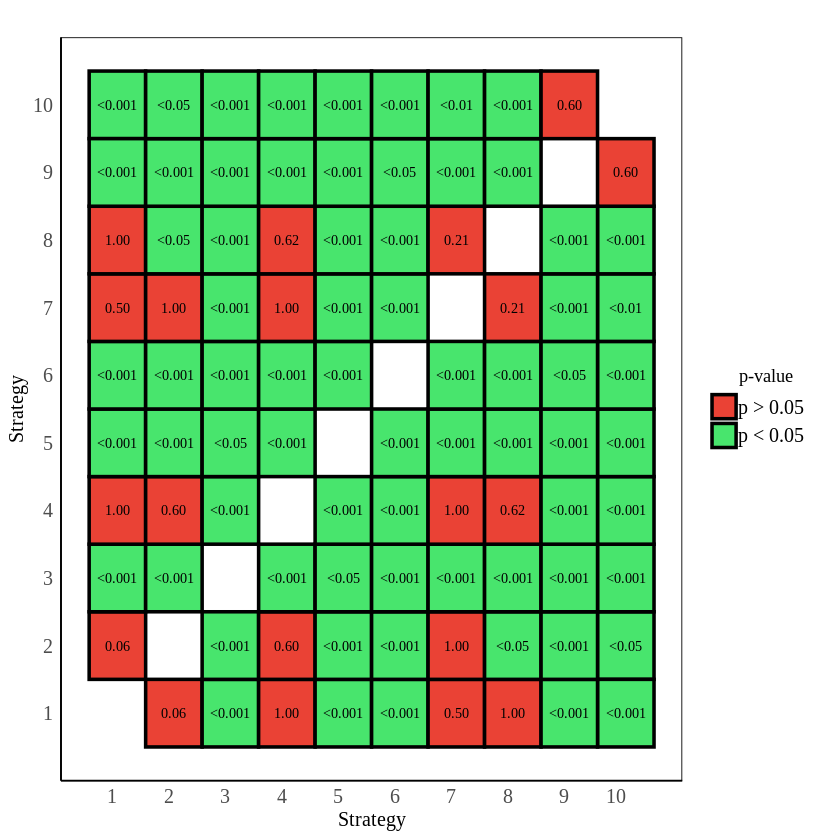

In [ ]:
# Load necessary libraries
library(ggplot2)
library(scales)

# Convert x and y to factors with the desired order
df_contrasts <- transform(df_contrasts,
                          x = as.numeric(gsub("Strat", "", sapply(strsplit(as.character(contrast), " - "), "[[", 1))),
                          y = as.numeric(gsub("Strat", "", sapply(strsplit(as.character(contrast), " - "), "[[", 2))))

# Reordering columns
df_contrasts <- df_contrasts[, c("x", "y", "p.value")]

# Create mirrored data
df_mirrored <- rbind(df_contrasts, transform(df_contrasts, x = y, y = x))

# Create function to format p-values
# Create function to format p-values
format_pvalue <- function(pvalue) {
  if (is.numeric(pvalue)) {
    ifelse(pvalue < 0.001, "<0.001",
           ifelse(pvalue < 0.01, "<0.01",
                  ifelse(pvalue < 0.05, "<0.05", sprintf("%.2f", pvalue))))
  } else {
    pvalue
  }
}

# Set font sizes
font_size_text <- 3  # Adjust font size for values in the heatmap
font_size_axes <- 12  # Adjust font size for axes labels

# Create a custom color palette
my_colors <- c("#EA4235", "#48E56D")

# Create heatmap with borders and a distinct color palette
plot <- ggplot(df_mirrored, aes(x = x, y = y, fill = p.value < 0.05)) +
  geom_tile(color = "black", size = 1) +  # Add borders around cells
  geom_text(aes(label = format_pvalue(p.value)), size = font_size_text, vjust = 0.5, hjust = 0.5, color = "black", family = "Times New Roman") +  # Center text
  scale_fill_manual(values = c("#EA4235", "#48E56D"), labels = c("p > 0.05", "p < 0.05"), name = "p-value") +  # Assign colors and labels
  labs(x = "Strategy",
       y = "Strategy",
       fill = NULL,
       title = " ",) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 1, size = font_size_axes, family = "Times New Roman"),  # Adjust font size for x axis labels
        axis.text.y = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for y axis labels
        axis.title.x = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for x axis title
        axis.title.y = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for y axis title
        legend.title = element_text(family = "Times New Roman", hjust = 0.5),  # Set legend title font and center it
        legend.title.align = 0.5,  # Center the legend title
        legend.text = element_text(size = font_size_axes, family = "Times New Roman", margin = margin(0, 10, 0, 0)),  # Adjust legend text size and margin
        panel.grid = element_blank(),  # Remove grid lines
        panel.border = element_rect(color = "black", fill = NA),  # Add border around plot
        axis.line = element_line(color = "black"),
        plot.title = element_text(hjust = 0.5, family = "Times New Roman"),
        plot.caption = element_text(hjust = 0.5, family = "Times New Roman")) +  # Center the title
  scale_x_continuous(breaks = seq(min(df_mirrored$x), max(df_mirrored$x), by = 1)) +
  scale_y_continuous(breaks = seq(min(df_mirrored$y), max(df_mirrored$y), by = 1))

# Save the plot as a scalable vector graphic (SVG) with higher resolution
plot
ggsave("HeatmapSpanishFull.svg", plot, width = 8, height = 6, dpi = 300)

## Spanish A


### 2.0 Load Data

In [ ]:
#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all tasks
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullAB.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all Task A and Task B for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullABEnglish.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all Task A and Task B for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullABSpanish.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task A for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajEnglishA.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task B for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajEnglishB.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task A for Spanish ONLY
data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajSpanishA.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task B for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajSpanishB.csv")

In [ ]:
# Set excel path for the data to be written
excel <- "ajSpanishA.xlsx"

### 2.1 Fit Ordinal Model

In [ ]:
# library(ordinal)

# # Convert Likert to factor
# data$Likert <- factor(data$Likert)

# # Fit the Ordinal Regression Model
# o <- clm(Likert ~ Strategy,
#          data = data)
# # Check summary of model
# summary(o)

In [ ]:
library(ordinal)
library(broom)
library(writexl)

# Convert Likert to factor
data$Likert <- factor(data$Likert)

# Fit the Ordinal Regression Model
o <- clm(Likert ~ Strategy + Assistant, data = data)

# Extract coefficients and related information
coefficients_df <- tidy(o)

# Extract Odds Ratios and Confidence Intervals
odds_ratio <- exp(coef(o))
conf_intervals <- exp(confint.default(o))

# Create a dataframe
effect <- rownames(coefficients_df)
coefficient <- coefficients_df$estimate
std_error <- coefficients_df$std.error
z_value <- coefficients_df$statistic
p_value <- coefficients_df$p.value
odds_ratio_val <- odds_ratio
ci_lower <- conf_intervals[, "2.5 %"]
ci_upper <- conf_intervals[, "97.5 %"]

# Combine into a dataframe
result_df <- data.frame(
  Effect = effect,
  Coefficient = round(coefficient, 2),
  `Std. Error` = round(std_error, 2),
  `Z Value` = round(z_value, 2),
  `P Value` = ifelse(p_value < 0.001, "<0.001***", ifelse(p_value < 0.01, "<0.01**", ifelse(p_value < 0.05, "<0.05*", round(p_value, 2)))),
  `Odds Ratio` = round(odds_ratio_val, 2),
  `CI Lower` = round(ci_lower, 2),
  `CI Upper` = round(ci_upper, 2)
)

# Extract main effects coefficients and related information
main_effects <- coefficients_df[grepl("Strategy|Assistant", coefficients_df$term) & !grepl(":", coefficients_df$term), ]

# Extract main effects Odds Ratios and Confidence Intervals
main_odds_ratio <- exp(coef(o)[grepl("Strategy|Assistant", names(coef(o))) & !grepl(":", names(coef(o)))])
main_conf_intervals <- exp(confint.default(o)[grepl("Strategy|Assistant", names(coef(o))) & !grepl(":", names(coef(o))), ])

# Create a dataframe for main effects
main_effects_df <- data.frame(
  Effect = main_effects$term,
  Coefficient = round(main_effects$estimate, 2),
  `Std. Error` = round(main_effects$std.error, 2),
  `Z Value` = round(main_effects$statistic, 2),
  `P Value` = ifelse(main_effects$p.value < 0.001, "<0.001***", ifelse(main_effects$p.value < 0.01, "<0.01**", ifelse(main_effects$p.value < 0.05, "<0.05*", round(main_effects$p.value, 2)))),
  `Odds Ratio` = round(main_odds_ratio, 2),
  `CI Lower` = round(main_conf_intervals[, "2.5 %"], 2),
  `CI Upper` = round(main_conf_intervals[, "97.5 %"], 2)
)

# Modify Effect labels for Main Effects
main_effects_df$Effect <- gsub("StrategyStrat", "Strategy ", main_effects_df$Effect)
main_effects_df$Effect <- gsub("AssistantSiri", "Siri", main_effects_df$Effect)

# Add "Strategy 1" with a coefficient of 0 to main effects
main_effects_df <- rbind(main_effects_df, data.frame(Effect = "Strategy 1", Coefficient = 0, `Std. Error` = NA, `Z Value` = NA, `P Value` = NA, `Odds Ratio` = NA, `CI Lower` = NA, `CI Upper` = NA))

# Order main effects dataframe by Coefficient in descending order
main_effects_df <- main_effects_df[order(-main_effects_df$Coefficient), ]

# Print the modified main effects dataframe
main_effects_df

# Extract interaction effects coefficients and related information
interaction_effects <- coefficients_df[grepl(":", coefficients_df$term), ]

# Extract interaction effects Odds Ratios and Confidence Intervals
interaction_odds_ratio <- exp(coef(o)[grepl(":", names(coef(o)))])
interaction_conf_intervals <- exp(confint.default(o)[grepl(":", names(coef(o))), ])

# Create a dataframe for interaction effects
interaction_effects_df <- data.frame(
  Effect = interaction_effects$term,
  Coefficient = round(interaction_effects$estimate, 2),
  `Std. Error` = round(interaction_effects$std.error, 2),
  `Z Value` = round(interaction_effects$statistic, 2),
  `P Value` = ifelse(interaction_effects$p.value < 0.001, "<0.001***", ifelse(interaction_effects$p.value < 0.01, "<0.01**", ifelse(interaction_effects$p.value < 0.05, "<0.05*", round(interaction_effects$p.value, 2)))),
  `Odds Ratio` = round(interaction_odds_ratio, 2),
  `CI Lower` = round(interaction_conf_intervals[, "2.5 %"], 2),
  `CI Upper` = round(interaction_conf_intervals[, "97.5 %"], 2)
)

# Modify Effect labels for Interaction Effects
interaction_effects_df$Effect <- gsub(":AssistantSiri", " - Siri", interaction_effects_df$Effect)
interaction_effects_df$Effect <- gsub("StrategyStrat", "Strategy ", interaction_effects_df$Effect)
interaction_effects_df$Effect <- gsub("AssistantSiri", "Siri", interaction_effects_df$Effect)

# Add "Strategy 1 - Siri" with a coefficient of 0 to interaction effects
interaction_effects_df <- rbind(interaction_effects_df, data.frame(Effect = "Strategy 1 - Siri", Coefficient = 0, `Std. Error` = NA, `Z Value` = NA, `P Value` = NA, `Odds Ratio` = NA, `CI Lower` = NA, `CI Upper` = NA))

# Order interaction effects dataframe by Coefficient in descending order
interaction_effects_df <- interaction_effects_df[order(-interaction_effects_df$Coefficient), ]

# Print the modified interaction effects dataframe
interaction_effects_df

# Create a workbook
wb <- createWorkbook()

# Add main_effects_df to the workbook
addWorksheet(wb, "Main Effects")
writeData(wb, "Main Effects", main_effects_df)

# Add interaction_effects_df to the workbook
addWorksheet(wb, "Interaction Effects")
writeData(wb, "Interaction Effects", interaction_effects_df)

# Save the workbook to Excel file
saveWorkbook(wb, file = excel, overwrite = TRUE)

# Confirm completion
cat("Dataframes written to 'excel' successfully!\n")

,Effect,Coefficient,Std..Error,Z.Value,P.Value,Odds.Ratio,CI.Lower,CI.Upper
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
StrategyStrat5,Strategy 5,2.12,0.27,7.79,<0.001***,8.31,4.88,14.15
StrategyStrat3,Strategy 3,1.10,0.29,3.86,<0.001***,3.01,1.72,5.26
StrategyStrat7,Strategy 7,0.77,0.25,3.04,<0.01**,2.15,1.31,3.52
AssistantSiri,Siri,0.43,0.12,3.70,<0.001***,1.53,1.22,1.92
StrategyStrat4,Strategy 4,0.21,0.25,0.84,0.4,1.23,0.76,2.02
StrategyStrat8,Strategy 8,0.09,0.25,0.37,0.71,1.10,0.68,1.78
1,Strategy 1,0.00,NA,NA,NA,NA,NA,NA
StrategyStrat2,Strategy 2,-0.10,0.26,-0.38,0.71,0.91,0.55,1.50
StrategyStrat10,Strategy 10,-0.41,0.26,-1.59,0.11,0.67,0.40,1.10


,Effect,Coefficient,Std..Error,Z.Value,P.Value,Odds.Ratio,CI.Lower,CI.Upper
,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,Strategy 1 - Siri,0,NA,NA,NA,NA,NA,NA


Dataframes written to 'excel' successfully!


### 2.2 Pairwise Comparisons for Strategies

In [ ]:
library(emmeans)

# Calculate Estimated Marginal Means for Strategy variable
emm_strategy <- emmeans(o, pairwise ~ Strategy)

# Extract the results
results <- summary(emm_strategy, adjust = "holm")

# Convert the contrasts table to a dataframe
df_contrasts <- as.data.frame(results$contrasts)

# Create a function to format P values
format_pvalue <- function(p_value) {
  if (p_value < 0.001) {
    return("<0.001***")
  } else if (p_value < 0.01) {
    return("<0.01**")
  } else if (p_value < 0.05) {
    return("<0.05*")
  } else {
    return(paste0("", round(p_value, 4)))
  }
}

# Create dataframe for pairwise comparisons
df_pairwise <- data.frame(
  Effect = df_contrasts$contrast,
  Coefficient = round(df_contrasts$estimate, 2),
  `Std. Error` = round(df_contrasts$SE, 2),
  `Z Value` = round(df_contrasts$z.ratio, 2),
  `P Value` = sapply(df_contrasts$p.value, format_pvalue),
  Odds_Ratio = round(exp(df_contrasts$estimate), 2),
  CI_Lower = round(exp(df_contrasts$estimate - 1.96 * df_contrasts$SE), 2),
  CI_Upper = round(exp(df_contrasts$estimate + 1.96 * df_contrasts$SE), 2)
)

# Print the new pairwise dataframe
print(df_pairwise)

# Load the existing workbook
wb <- loadWorkbook(excel)

# Add a new sheet to the existing workbook
addWorksheet(wb, "Pairwise_Comparisons")

# Write the dataframe to the new sheet in the existing workbook
writeData(wb, sheet = "Pairwise_Comparisons", x = df_pairwise)

# Save the workbook with the new sheet, overwriting the existing file
saveWorkbook(wb, excel, overwrite = TRUE)

             Effect Coefficient Std..Error Z.Value   P.Value Odds_Ratio
1  Strat1 - Strat10        0.41       0.26    1.59    0.9997       1.50
2   Strat1 - Strat2        0.10       0.26    0.38         1       1.10
3   Strat1 - Strat3       -1.10       0.29   -3.86   <0.01**       0.33
4   Strat1 - Strat4       -0.21       0.25   -0.84         1       0.81
5   Strat1 - Strat5       -2.12       0.27   -7.79 <0.001***       0.12
6   Strat1 - Strat6        1.61       0.26    6.12 <0.001***       5.01
7   Strat1 - Strat7       -0.77       0.25   -3.04    <0.05*       0.46
8   Strat1 - Strat8       -0.09       0.25   -0.37         1       0.91
9   Strat1 - Strat9        0.99       0.26    3.84   <0.01**       2.69
10 Strat10 - Strat2       -0.31       0.25   -1.23         1       0.73
11 Strat10 - Strat3       -1.51       0.28   -5.31 <0.001***       0.22
12 Strat10 - Strat4       -0.62       0.25   -2.49    0.1779       0.54
13 Strat10 - Strat5       -2.52       0.27   -9.29 <0.001***    

### 2.3 Create Heatmap for Strategies

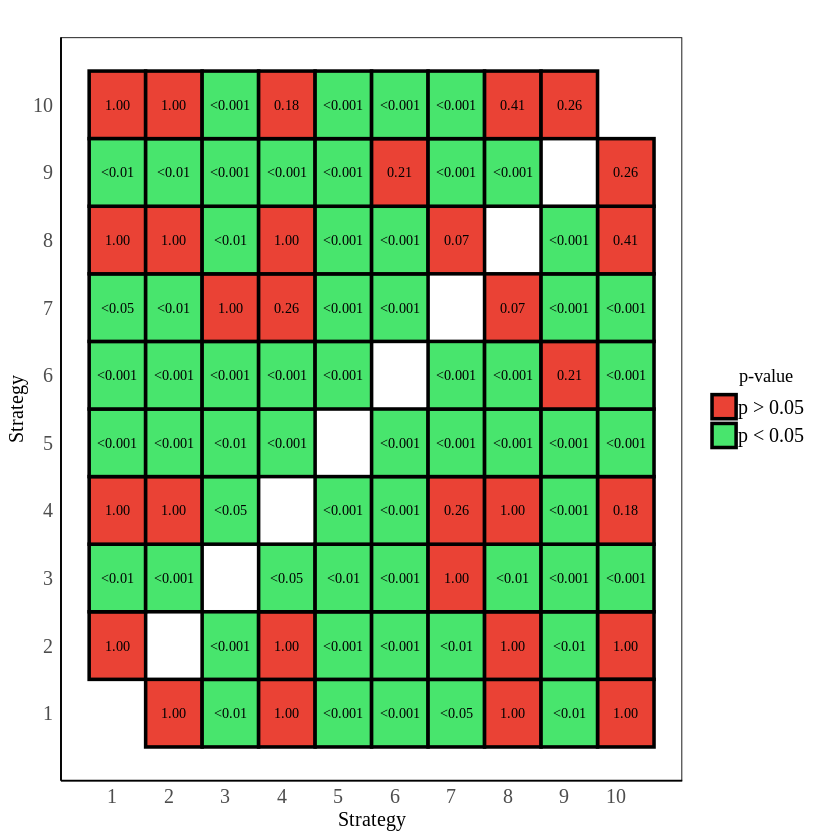

In [ ]:
# Load necessary libraries
library(ggplot2)
library(scales)

# Convert x and y to factors with the desired order
df_contrasts <- transform(df_contrasts,
                          x = as.numeric(gsub("Strat", "", sapply(strsplit(as.character(contrast), " - "), "[[", 1))),
                          y = as.numeric(gsub("Strat", "", sapply(strsplit(as.character(contrast), " - "), "[[", 2))))

# Reordering columns
df_contrasts <- df_contrasts[, c("x", "y", "p.value")]

# Create mirrored data
df_mirrored <- rbind(df_contrasts, transform(df_contrasts, x = y, y = x))

# Create function to format p-values
# Create function to format p-values
format_pvalue <- function(pvalue) {
  if (is.numeric(pvalue)) {
    ifelse(pvalue < 0.001, "<0.001",
           ifelse(pvalue < 0.01, "<0.01",
                  ifelse(pvalue < 0.05, "<0.05", sprintf("%.2f", pvalue))))
  } else {
    pvalue
  }
}

# Set font sizes
font_size_text <- 3  # Adjust font size for values in the heatmap
font_size_axes <- 12  # Adjust font size for axes labels

# Create a custom color palette
my_colors <- c("#EA4235", "#48E56D")

# Create heatmap with borders and a distinct color palette
plot <- ggplot(df_mirrored, aes(x = x, y = y, fill = p.value < 0.05)) +
  geom_tile(color = "black", size = 1) +  # Add borders around cells
  geom_text(aes(label = format_pvalue(p.value)), size = font_size_text, vjust = 0.5, hjust = 0.5, color = "black", family = "Times New Roman") +  # Center text
  scale_fill_manual(values = c("#EA4235", "#48E56D"), labels = c("p > 0.05", "p < 0.05"), name = "p-value") +  # Assign colors and labels
  labs(x = "Strategy",
       y = "Strategy",
       fill = NULL,
       title = " ",) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 1, size = font_size_axes, family = "Times New Roman"),  # Adjust font size for x axis labels
        axis.text.y = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for y axis labels
        axis.title.x = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for x axis title
        axis.title.y = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for y axis title
        legend.title = element_text(family = "Times New Roman", hjust = 0.5),  # Set legend title font and center it
        legend.title.align = 0.5,  # Center the legend title
        legend.text = element_text(size = font_size_axes, family = "Times New Roman", margin = margin(0, 10, 0, 0)),  # Adjust legend text size and margin
        panel.grid = element_blank(),  # Remove grid lines
        panel.border = element_rect(color = "black", fill = NA),  # Add border around plot
        axis.line = element_line(color = "black"),
        plot.title = element_text(hjust = 0.5, family = "Times New Roman"),
        plot.caption = element_text(hjust = 0.5, family = "Times New Roman")) +  # Center the title
  scale_x_continuous(breaks = seq(min(df_mirrored$x), max(df_mirrored$x), by = 1)) +
  scale_y_continuous(breaks = seq(min(df_mirrored$y), max(df_mirrored$y), by = 1))

# Save the plot as a scalable vector graphic (SVG) with higher resolution
plot
ggsave("HeatmapSpanishA.svg", plot, width = 8, height = 6, dpi = 300)

## Spanish B


### 2.0 Load Data

In [ ]:
#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all tasks
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullAB.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all Task A and Task B for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullABEnglish.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for all Task A and Task B for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajfullABSpanish.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task A for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajEnglishA.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task B for English ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajEnglishB.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task A for Spanish ONLY
# data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajSpanishA.csv")

#This is the data that shows Language, Task, Strategy, and Likert Scores (acceptability judgements) for Task B for Spanish ONLY
data <- read.csv("https://raw.githubusercontent.com/MatthewCGalbraith/FrontiersData/main/ajSpanishB.csv")

In [ ]:
# Set excel path for the data to be written
excel <- "ajSpanishB.xlsx"

### 2.1 Fit Ordinal Model

In [ ]:
# library(ordinal)

# # Convert Likert to factor
# data$Likert <- factor(data$Likert)

# # Fit the Ordinal Regression Model
# o <- clm(Likert ~ Strategy,
#          data = data)
# # Check summary of model
# summary(o)

In [ ]:
library(ordinal)
library(broom)
library(writexl)

# Convert Likert to factor
data$Likert <- factor(data$Likert)

# Fit the Ordinal Regression Model
o <- clm(Likert ~ Strategy + Assistant, data = data)

# Extract coefficients and related information
coefficients_df <- tidy(o)

# Extract Odds Ratios and Confidence Intervals
odds_ratio <- exp(coef(o))
conf_intervals <- exp(confint.default(o))

# Create a dataframe
effect <- rownames(coefficients_df)
coefficient <- coefficients_df$estimate
std_error <- coefficients_df$std.error
z_value <- coefficients_df$statistic
p_value <- coefficients_df$p.value
odds_ratio_val <- odds_ratio
ci_lower <- conf_intervals[, "2.5 %"]
ci_upper <- conf_intervals[, "97.5 %"]

# Combine into a dataframe
result_df <- data.frame(
  Effect = effect,
  Coefficient = round(coefficient, 2),
  `Std. Error` = round(std_error, 2),
  `Z Value` = round(z_value, 2),
  `P Value` = ifelse(p_value < 0.001, "<0.001***", ifelse(p_value < 0.01, "<0.01**", ifelse(p_value < 0.05, "<0.05*", round(p_value, 2)))),
  `Odds Ratio` = round(odds_ratio_val, 2),
  `CI Lower` = round(ci_lower, 2),
  `CI Upper` = round(ci_upper, 2)
)

# Extract main effects coefficients and related information
main_effects <- coefficients_df[grepl("Strategy|Assistant", coefficients_df$term) & !grepl(":", coefficients_df$term), ]

# Extract main effects Odds Ratios and Confidence Intervals
main_odds_ratio <- exp(coef(o)[grepl("Strategy|Assistant", names(coef(o))) & !grepl(":", names(coef(o)))])
main_conf_intervals <- exp(confint.default(o)[grepl("Strategy|Assistant", names(coef(o))) & !grepl(":", names(coef(o))), ])

# Create a dataframe for main effects
main_effects_df <- data.frame(
  Effect = main_effects$term,
  Coefficient = round(main_effects$estimate, 2),
  `Std. Error` = round(main_effects$std.error, 2),
  `Z Value` = round(main_effects$statistic, 2),
  `P Value` = ifelse(main_effects$p.value < 0.001, "<0.001***", ifelse(main_effects$p.value < 0.01, "<0.01**", ifelse(main_effects$p.value < 0.05, "<0.05*", round(main_effects$p.value, 2)))),
  `Odds Ratio` = round(main_odds_ratio, 2),
  `CI Lower` = round(main_conf_intervals[, "2.5 %"], 2),
  `CI Upper` = round(main_conf_intervals[, "97.5 %"], 2)
)

# Modify Effect labels for Main Effects
main_effects_df$Effect <- gsub("StrategyStrat", "Strategy ", main_effects_df$Effect)
main_effects_df$Effect <- gsub("AssistantSiri", "Siri", main_effects_df$Effect)

# Add "Strategy 1" with a coefficient of 0 to main effects
main_effects_df <- rbind(main_effects_df, data.frame(Effect = "Strategy 1", Coefficient = 0, `Std. Error` = NA, `Z Value` = NA, `P Value` = NA, `Odds Ratio` = NA, `CI Lower` = NA, `CI Upper` = NA))

# Order main effects dataframe by Coefficient in descending order
main_effects_df <- main_effects_df[order(-main_effects_df$Coefficient), ]

# Print the modified main effects dataframe
main_effects_df

# Extract interaction effects coefficients and related information
interaction_effects <- coefficients_df[grepl(":", coefficients_df$term), ]

# Extract interaction effects Odds Ratios and Confidence Intervals
interaction_odds_ratio <- exp(coef(o)[grepl(":", names(coef(o)))])
interaction_conf_intervals <- exp(confint.default(o)[grepl(":", names(coef(o))), ])

# Create a dataframe for interaction effects
interaction_effects_df <- data.frame(
  Effect = interaction_effects$term,
  Coefficient = round(interaction_effects$estimate, 2),
  `Std. Error` = round(interaction_effects$std.error, 2),
  `Z Value` = round(interaction_effects$statistic, 2),
  `P Value` = ifelse(interaction_effects$p.value < 0.001, "<0.001***", ifelse(interaction_effects$p.value < 0.01, "<0.01**", ifelse(interaction_effects$p.value < 0.05, "<0.05*", round(interaction_effects$p.value, 2)))),
  `Odds Ratio` = round(interaction_odds_ratio, 2),
  `CI Lower` = round(interaction_conf_intervals[, "2.5 %"], 2),
  `CI Upper` = round(interaction_conf_intervals[, "97.5 %"], 2)
)

# Modify Effect labels for Interaction Effects
interaction_effects_df$Effect <- gsub(":AssistantSiri", " - Siri", interaction_effects_df$Effect)
interaction_effects_df$Effect <- gsub("StrategyStrat", "Strategy ", interaction_effects_df$Effect)
interaction_effects_df$Effect <- gsub("AssistantSiri", "Siri", interaction_effects_df$Effect)

# Add "Strategy 1 - Siri" with a coefficient of 0 to interaction effects
interaction_effects_df <- rbind(interaction_effects_df, data.frame(Effect = "Strategy 1 - Siri", Coefficient = 0, `Std. Error` = NA, `Z Value` = NA, `P Value` = NA, `Odds Ratio` = NA, `CI Lower` = NA, `CI Upper` = NA))

# Order interaction effects dataframe by Coefficient in descending order
interaction_effects_df <- interaction_effects_df[order(-interaction_effects_df$Coefficient), ]

# Print the modified interaction effects dataframe
interaction_effects_df

# Create a workbook
wb <- createWorkbook()

# Add main_effects_df to the workbook
addWorksheet(wb, "Main Effects")
writeData(wb, "Main Effects", main_effects_df)

# Add interaction_effects_df to the workbook
addWorksheet(wb, "Interaction Effects")
writeData(wb, "Interaction Effects", interaction_effects_df)

# Save the workbook to Excel file
saveWorkbook(wb, file = excel, overwrite = TRUE)

# Confirm completion
cat("Dataframes written to 'excel' successfully!\n")

,Effect,Coefficient,Std..Error,Z.Value,P.Value,Odds.Ratio,CI.Lower,CI.Upper
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
StrategyStrat5,Strategy 5,2.24,0.32,7.06,<0.001***,9.36,5.03,17.41
StrategyStrat3,Strategy 3,1.67,0.28,5.88,<0.001***,5.34,3.06,9.33
AssistantSiri,Siri,0.45,0.12,3.72,<0.001***,1.56,1.23,1.97
StrategyStrat8,Strategy 8,0.11,0.25,0.42,0.67,1.11,0.68,1.80
1,Strategy 1,0.00,NA,NA,NA,NA,NA,NA
StrategyStrat4,Strategy 4,-0.63,0.26,-2.44,<0.05*,0.53,0.32,0.88
StrategyStrat2,Strategy 2,-0.92,0.26,-3.55,<0.001***,0.40,0.24,0.66
StrategyStrat7,Strategy 7,-1.65,0.26,-6.25,<0.001***,0.19,0.11,0.32
StrategyStrat10,Strategy 10,-1.72,0.26,-6.69,<0.001***,0.18,0.11,0.30


,Effect,Coefficient,Std..Error,Z.Value,P.Value,Odds.Ratio,CI.Lower,CI.Upper
,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,Strategy 1 - Siri,0,NA,NA,NA,NA,NA,NA


Dataframes written to 'excel' successfully!


### 2.2 Pairwise Comparisons for Strategies

In [ ]:
library(emmeans)

# Calculate Estimated Marginal Means for Strategy variable
emm_strategy <- emmeans(o, pairwise ~ Strategy)

# Extract the results
results <- summary(emm_strategy, adjust = "holm")

# Convert the contrasts table to a dataframe
df_contrasts <- as.data.frame(results$contrasts)

# Create a function to format P values
format_pvalue <- function(p_value) {
  if (p_value < 0.001) {
    return("<0.001***")
  } else if (p_value < 0.01) {
    return("<0.01**")
  } else if (p_value < 0.05) {
    return("<0.05*")
  } else {
    return(paste0("", round(p_value, 4)))
  }
}

# Create dataframe for pairwise comparisons
df_pairwise <- data.frame(
  Effect = df_contrasts$contrast,
  Coefficient = round(df_contrasts$estimate, 2),
  `Std. Error` = round(df_contrasts$SE, 2),
  `Z Value` = round(df_contrasts$z.ratio, 2),
  `P Value` = sapply(df_contrasts$p.value, format_pvalue),
  Odds_Ratio = round(exp(df_contrasts$estimate), 2),
  CI_Lower = round(exp(df_contrasts$estimate - 1.96 * df_contrasts$SE), 2),
  CI_Upper = round(exp(df_contrasts$estimate + 1.96 * df_contrasts$SE), 2)
)

# Print the new pairwise dataframe
print(df_pairwise)

# Load the existing workbook
wb <- loadWorkbook(excel)

# Add a new sheet to the existing workbook
addWorksheet(wb, "Pairwise_Comparisons")

# Write the dataframe to the new sheet in the existing workbook
writeData(wb, sheet = "Pairwise_Comparisons", x = df_pairwise)

# Save the workbook with the new sheet, overwriting the existing file
saveWorkbook(wb, excel, overwrite = TRUE)

             Effect Coefficient Std..Error Z.Value   P.Value Odds_Ratio
1  Strat1 - Strat10        1.72       0.26    6.69 <0.001***       5.61
2   Strat1 - Strat2        0.92       0.26    3.55   <0.01**       2.51
3   Strat1 - Strat3       -1.67       0.28   -5.88 <0.001***       0.19
4   Strat1 - Strat4        0.63       0.26    2.44    0.1457       1.87
5   Strat1 - Strat5       -2.24       0.32   -7.06 <0.001***       0.11
6   Strat1 - Strat6        2.22       0.26    8.62 <0.001***       9.24
7   Strat1 - Strat7        1.65       0.26    6.25 <0.001***       5.21
8   Strat1 - Strat8       -0.11       0.25   -0.42         1       0.90
9   Strat1 - Strat9        1.75       0.25    6.89 <0.001***       5.76
10 Strat10 - Strat2       -0.80       0.26   -3.09    <0.05*       0.45
11 Strat10 - Strat3       -3.40       0.30  -11.44 <0.001***       0.03
12 Strat10 - Strat4       -1.10       0.26   -4.22 <0.001***       0.33
13 Strat10 - Strat5       -3.96       0.33  -12.06 <0.001***    

### 2.3 Create Heatmap for Strategies

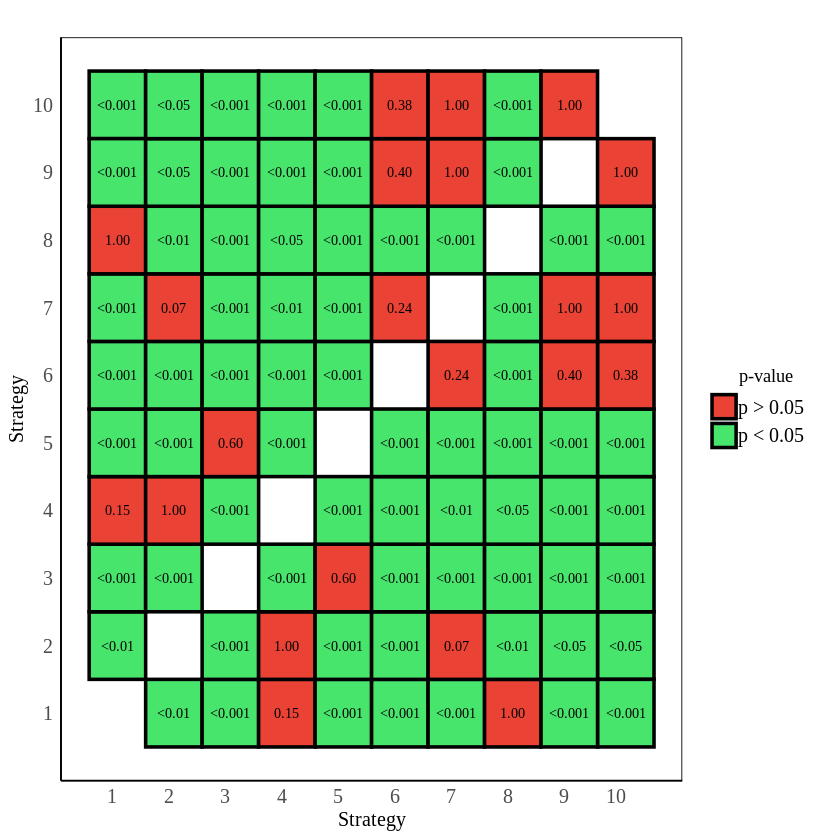

In [ ]:
# Load necessary libraries
library(ggplot2)
library(scales)

# Convert x and y to factors with the desired order
df_contrasts <- transform(df_contrasts,
                          x = as.numeric(gsub("Strat", "", sapply(strsplit(as.character(contrast), " - "), "[[", 1))),
                          y = as.numeric(gsub("Strat", "", sapply(strsplit(as.character(contrast), " - "), "[[", 2))))

# Reordering columns
df_contrasts <- df_contrasts[, c("x", "y", "p.value")]

# Create mirrored data
df_mirrored <- rbind(df_contrasts, transform(df_contrasts, x = y, y = x))

# Create function to format p-values
# Create function to format p-values
format_pvalue <- function(pvalue) {
  if (is.numeric(pvalue)) {
    ifelse(pvalue < 0.001, "<0.001",
           ifelse(pvalue < 0.01, "<0.01",
                  ifelse(pvalue < 0.05, "<0.05", sprintf("%.2f", pvalue))))
  } else {
    pvalue
  }
}

# Set font sizes
font_size_text <- 3  # Adjust font size for values in the heatmap
font_size_axes <- 12  # Adjust font size for axes labels

# Create a custom color palette
my_colors <- c("#EA4235", "#48E56D")

# Create heatmap with borders and a distinct color palette
plot <- ggplot(df_mirrored, aes(x = x, y = y, fill = p.value < 0.05)) +
  geom_tile(color = "black", size = 1) +  # Add borders around cells
  geom_text(aes(label = format_pvalue(p.value)), size = font_size_text, vjust = 0.5, hjust = 0.5, color = "black", family = "Times New Roman") +  # Center text
  scale_fill_manual(values = c("#EA4235", "#48E56D"), labels = c("p > 0.05", "p < 0.05"), name = "p-value") +  # Assign colors and labels
  labs(x = "Strategy",
       y = "Strategy",
       fill = NULL,
       title = " ",) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 1, size = font_size_axes, family = "Times New Roman"),  # Adjust font size for x axis labels
        axis.text.y = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for y axis labels
        axis.title.x = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for x axis title
        axis.title.y = element_text(size = font_size_axes, family = "Times New Roman"),  # Adjust font size for y axis title
        legend.title = element_text(family = "Times New Roman", hjust = 0.5),  # Set legend title font and center it
        legend.title.align = 0.5,  # Center the legend title
        legend.text = element_text(size = font_size_axes, family = "Times New Roman", margin = margin(0, 10, 0, 0)),  # Adjust legend text size and margin
        panel.grid = element_blank(),  # Remove grid lines
        panel.border = element_rect(color = "black", fill = NA),  # Add border around plot
        axis.line = element_line(color = "black"),
        plot.title = element_text(hjust = 0.5, family = "Times New Roman"),
        plot.caption = element_text(hjust = 0.5, family = "Times New Roman")) +  # Center the title
  scale_x_continuous(breaks = seq(min(df_mirrored$x), max(df_mirrored$x), by = 1)) +
  scale_y_continuous(breaks = seq(min(df_mirrored$y), max(df_mirrored$y), by = 1))

# Save the plot as a scalable vector graphic (SVG) with higher resolution
plot
ggsave("HeatmapSpanishB.svg", plot, width = 8, height = 6, dpi = 300)